In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, LSTM, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_alstm_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## AttentiveLSTM one LSTM-layer, 400 neurons

In [ ]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#LSTM Layer
x = LSTM(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences)

#Attention Layer
x = Attention()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


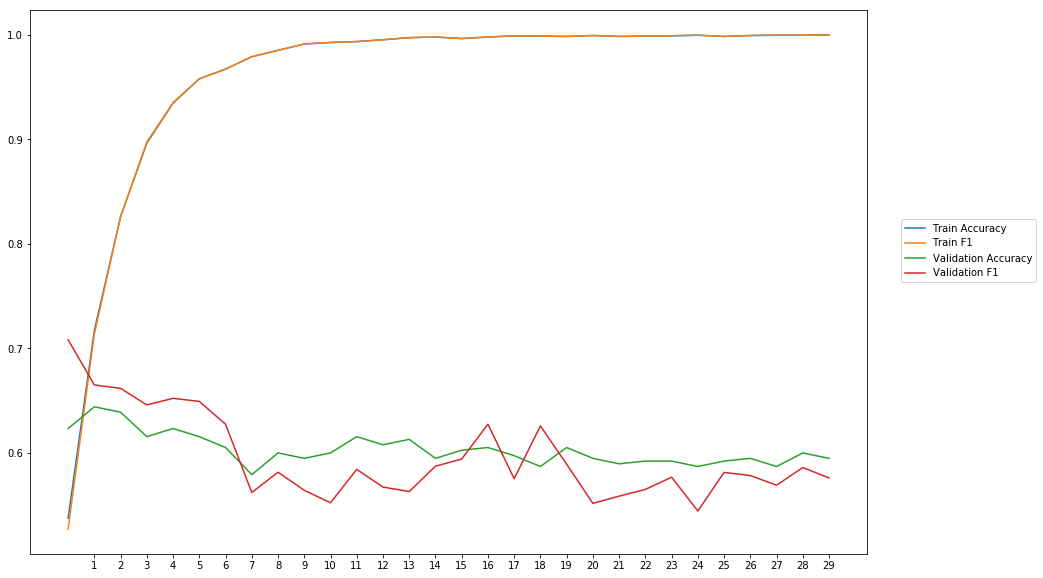

Average Accuracy: 60.31%
Average Precision: 60.85%
Average Recall: 59.14%
Average F1: 59.57%

-----Fold 2--------


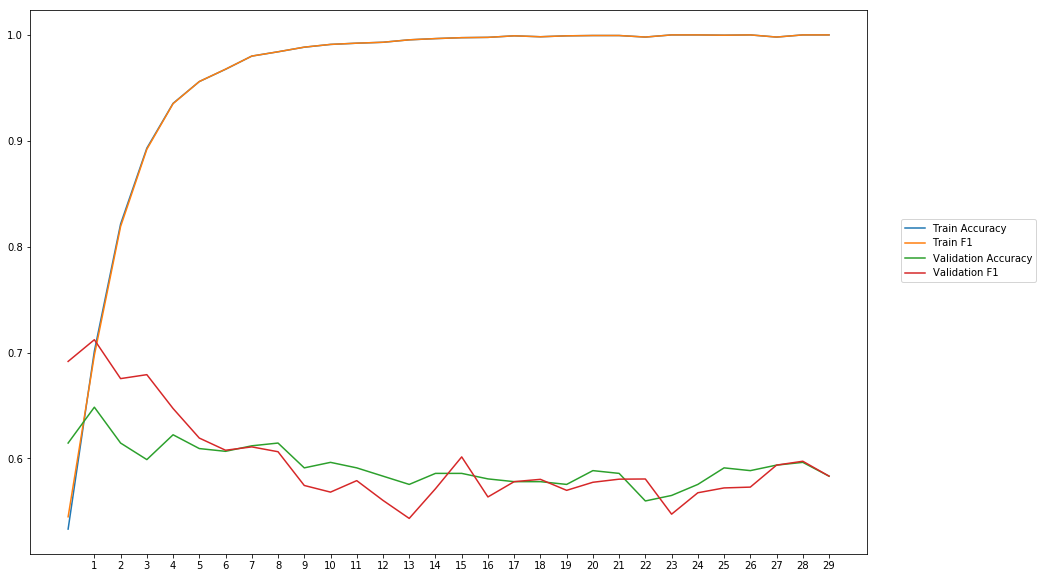

Average Accuracy: 59.31%
Average Precision: 59.34%
Average Recall: 60.86%
Average F1: 59.71%

-----Fold 3--------


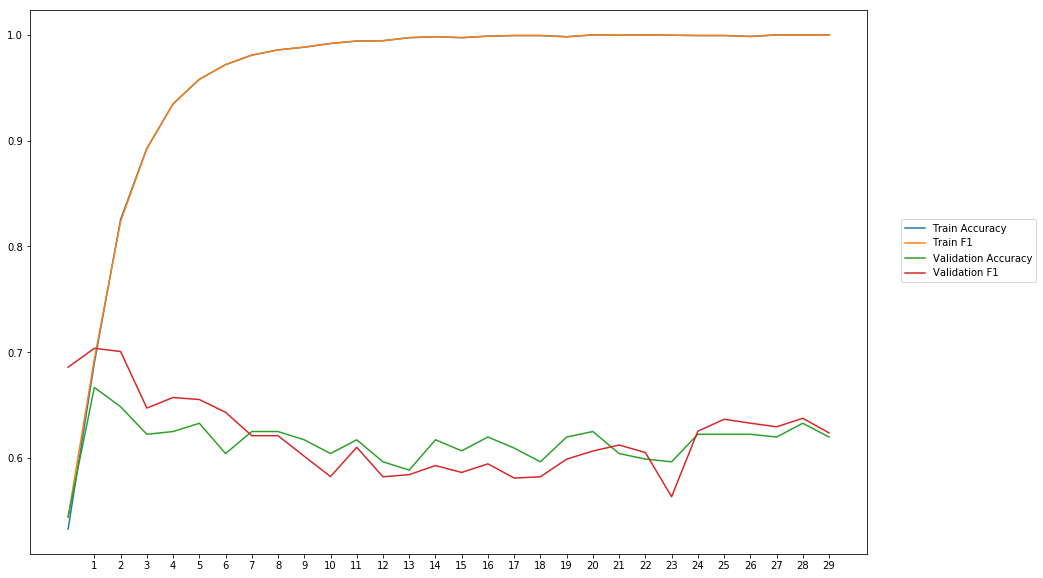

Average Accuracy: 61.50%
Average Precision: 61.67%
Average Recall: 63.26%
Average F1: 62.01%

-----Fold 4--------


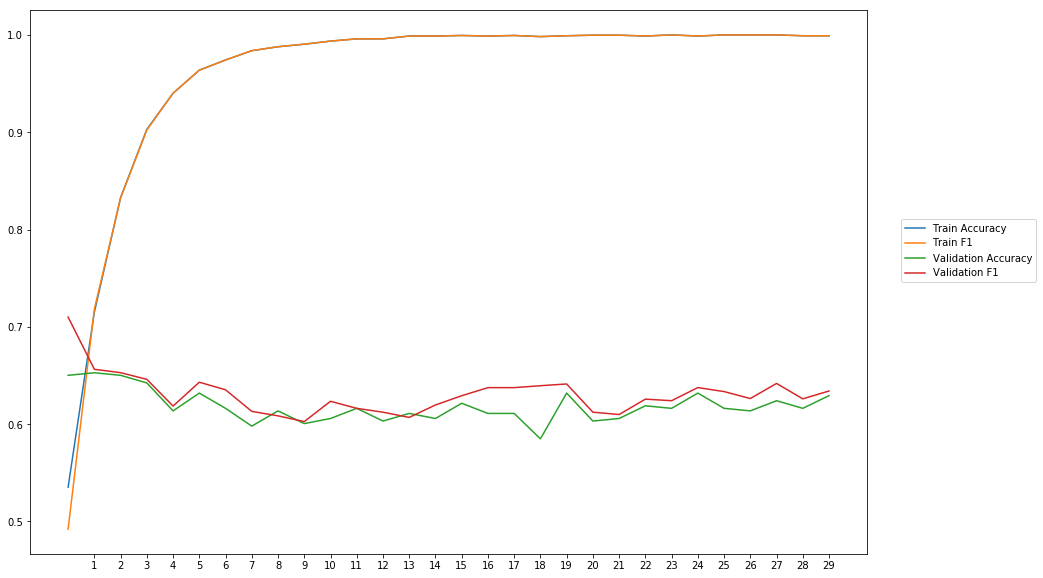

Average Accuracy: 61.82%
Average Precision: 61.26%
Average Recall: 65.19%
Average F1: 63.07%

-----Fold 5--------


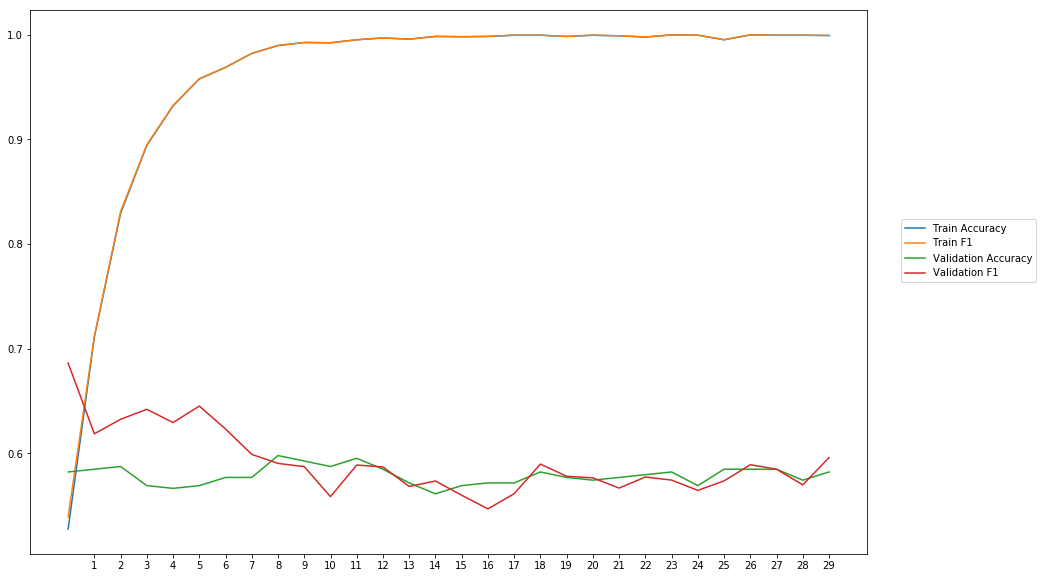

Average Accuracy: 57.90%
Average Precision: 57.70%
Average Recall: 61.41%
Average F1: 59.14%

-----Fold 6--------


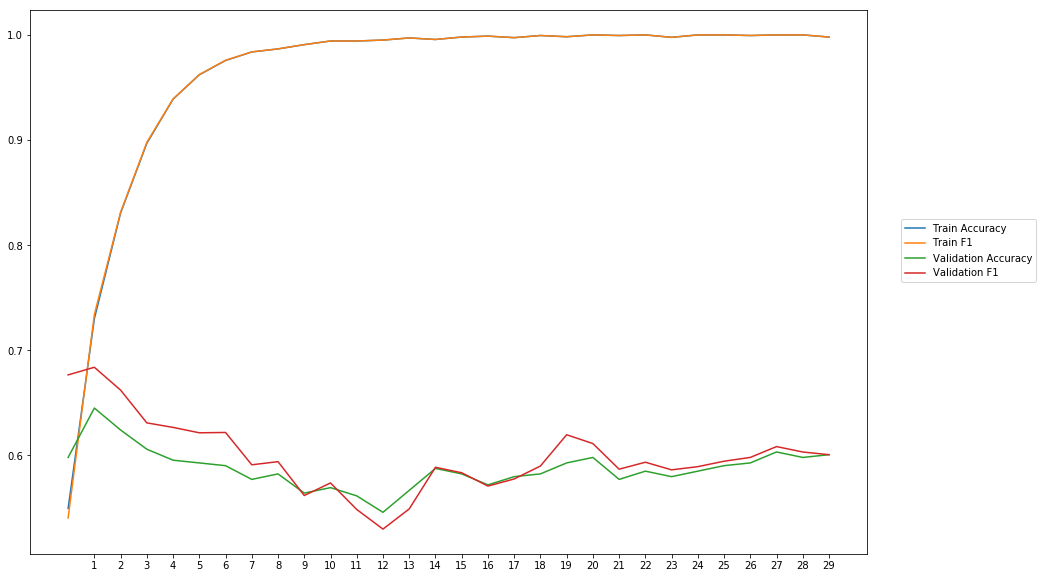

Average Accuracy: 58.74%
Average Precision: 58.31%
Average Recall: 61.89%
Average F1: 59.90%

-----Fold 7--------


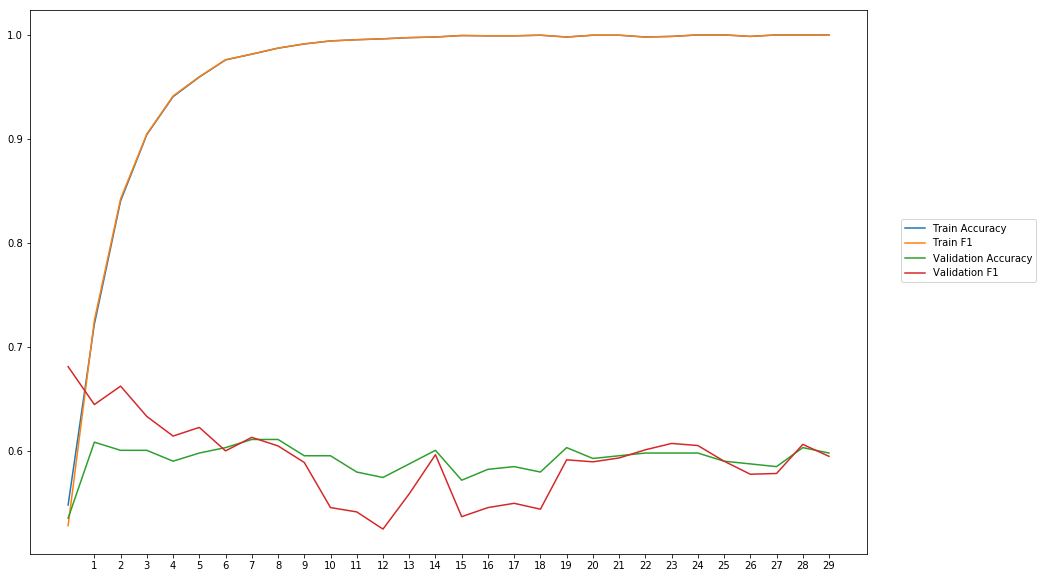

Average Accuracy: 59.19%
Average Precision: 59.52%
Average Recall: 59.72%
Average F1: 59.14%

-----Fold 8--------


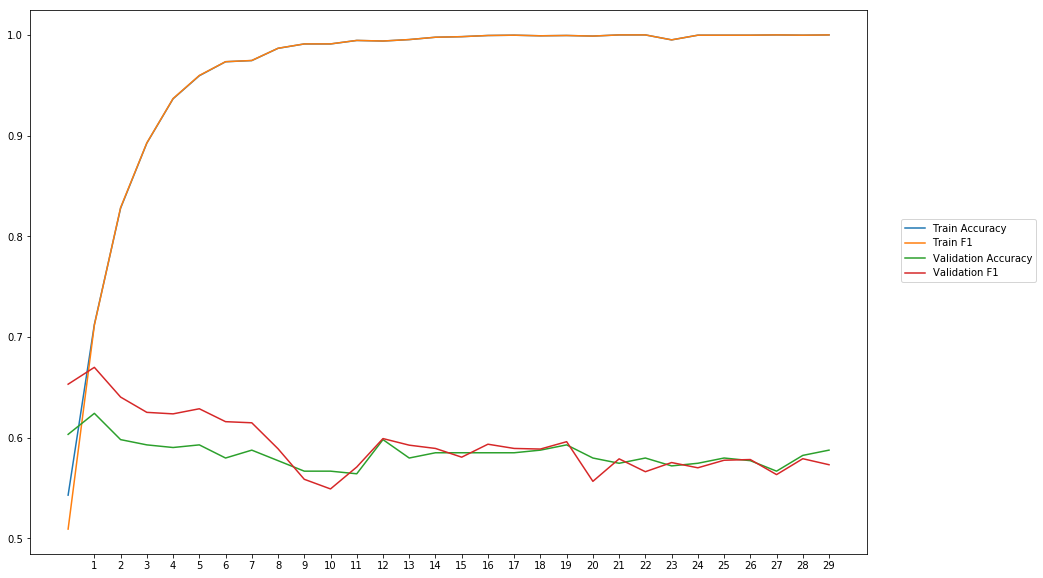

Average Accuracy: 58.37%
Average Precision: 58.11%
Average Recall: 60.78%
Average F1: 59.27%

-----Fold 9--------


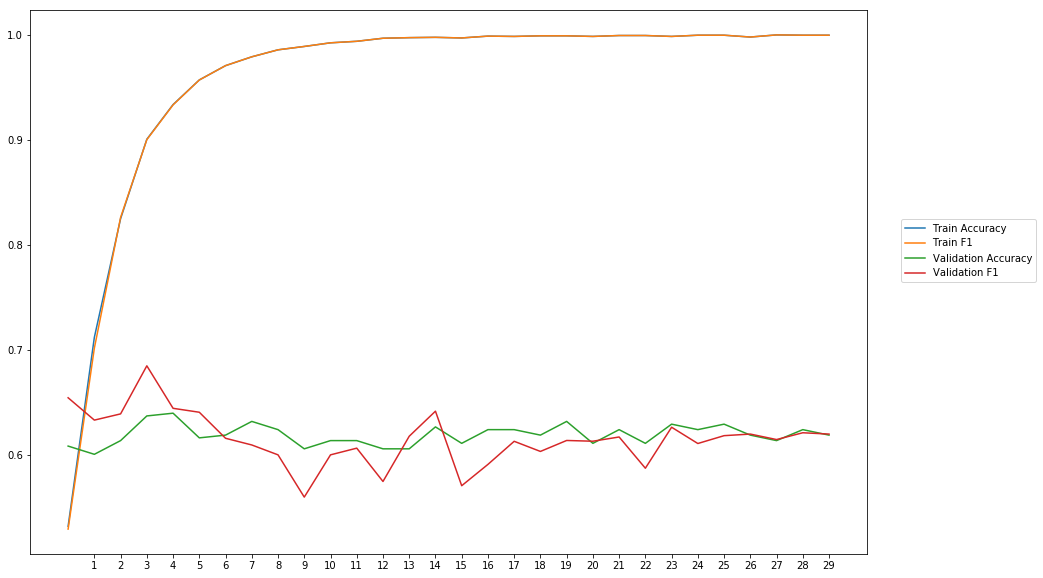

Average Accuracy: 61.91%
Average Precision: 62.40%
Average Recall: 61.13%
Average F1: 61.54%

-----Fold 10--------


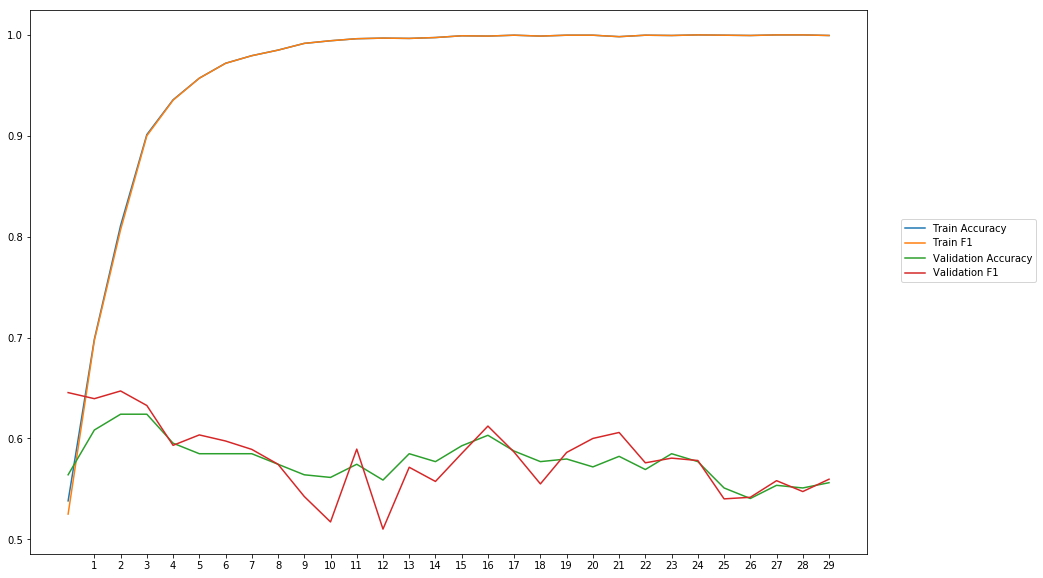

Average Accuracy: 57.81%
Average Precision: 57.83%
Average Recall: 58.68%
Average F1: 58.07%

-------Overallresults-------


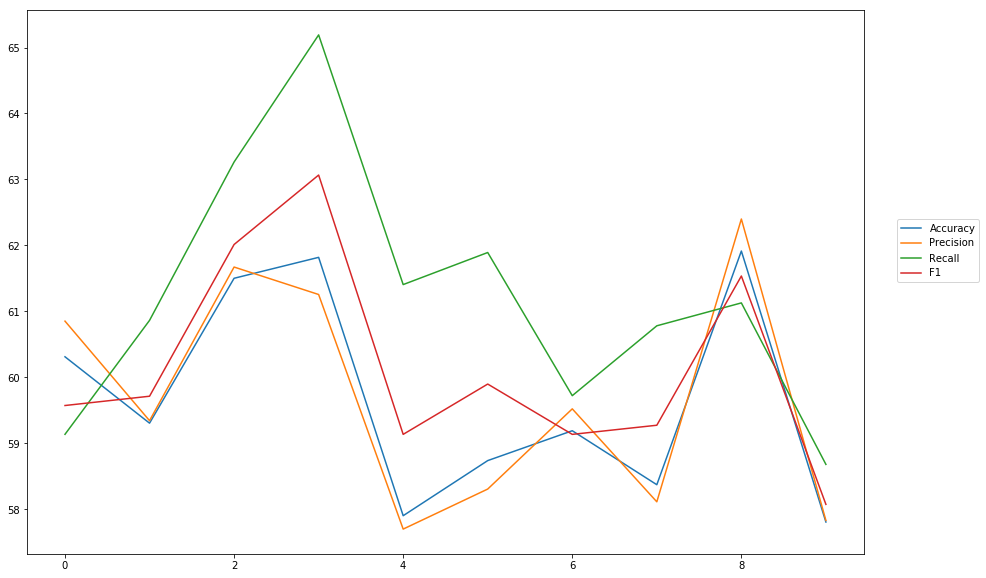

Accuracy: Mean = 59.69% (+/- 1.51%), Max = 61.91%, Min =  57.81%
Precision: Mean = 59.70% (+/- 1.64%), Max = 62.40%, Min =  57.70%
Recall: Mean = 61.21% (+/- 1.84%), Max = 65.19%, Min =  58.68%
F1: Mean = 60.14% (+/- 1.47%), Max = 63.07%, Min =  58.07%


In [8]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'alstm_1_400')  

## AttentiveLSTM two LSTM-Layer, each 400 Neurons

In [ ]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#LSTM Layer
x2 = LSTM(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences2)
x2 = LSTM(400, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(x2)

#Attention Layer
x2 = Attention()(x2)

#Output (Dense) Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


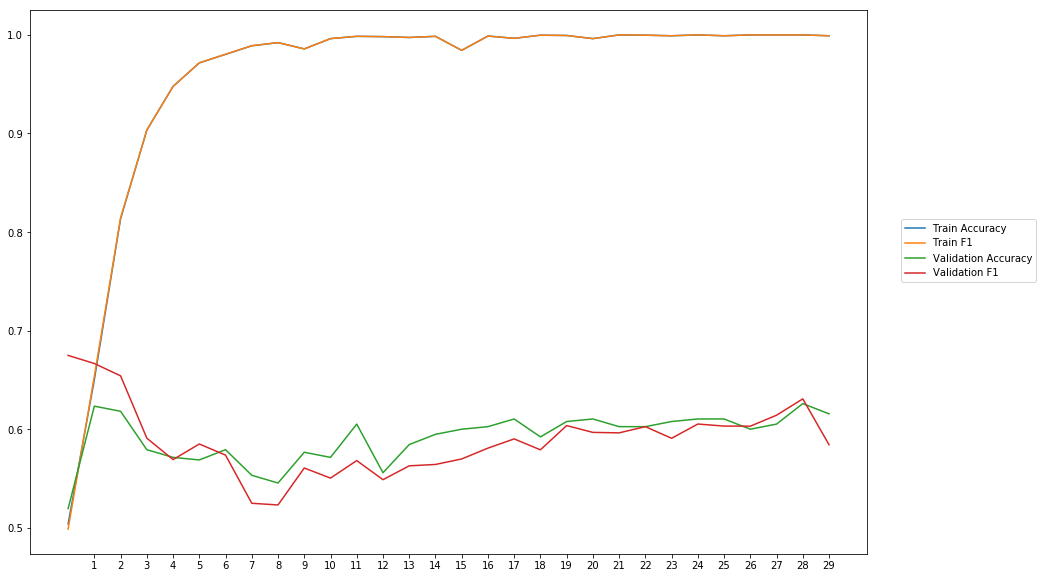

Average Accuracy: 59.17%
Average Precision: 59.66%
Average Recall: 58.96%
Average F1: 58.89%

-----Fold 2--------


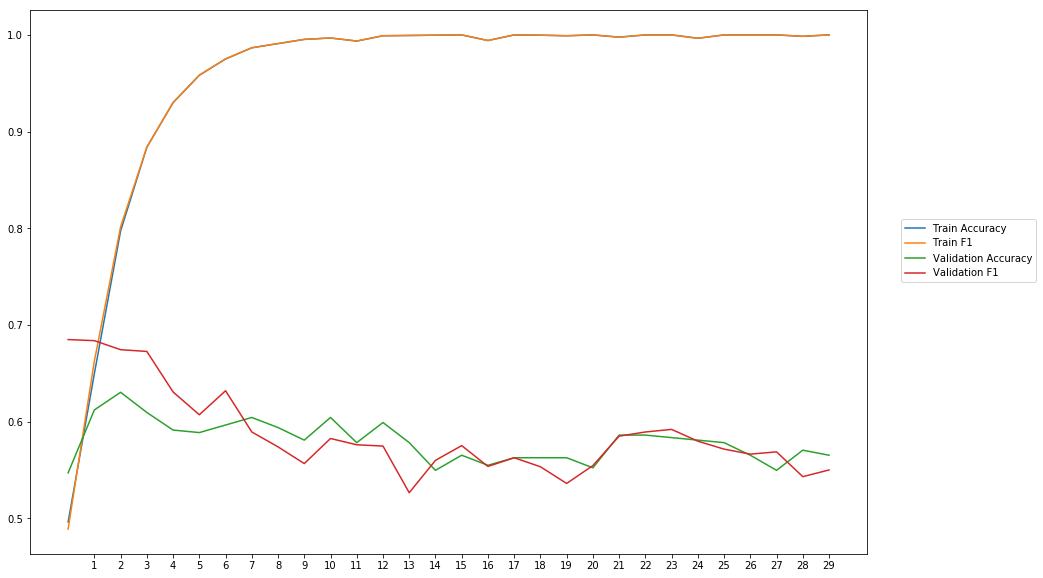

Average Accuracy: 57.95%
Average Precision: 58.03%
Average Recall: 60.35%
Average F1: 58.67%

-----Fold 3--------


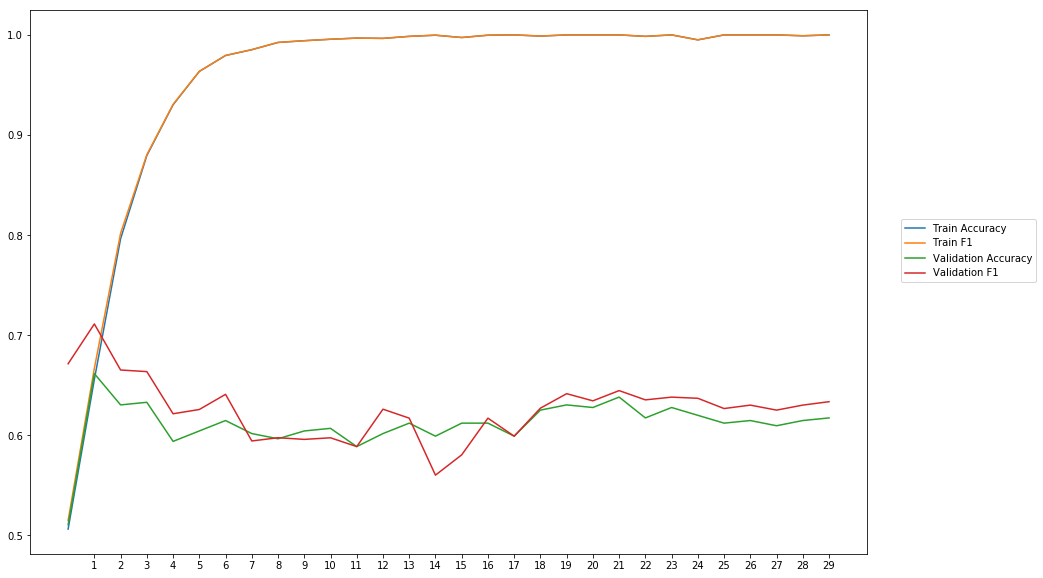

Average Accuracy: 61.11%
Average Precision: 60.81%
Average Recall: 65.22%
Average F1: 62.58%

-----Fold 4--------


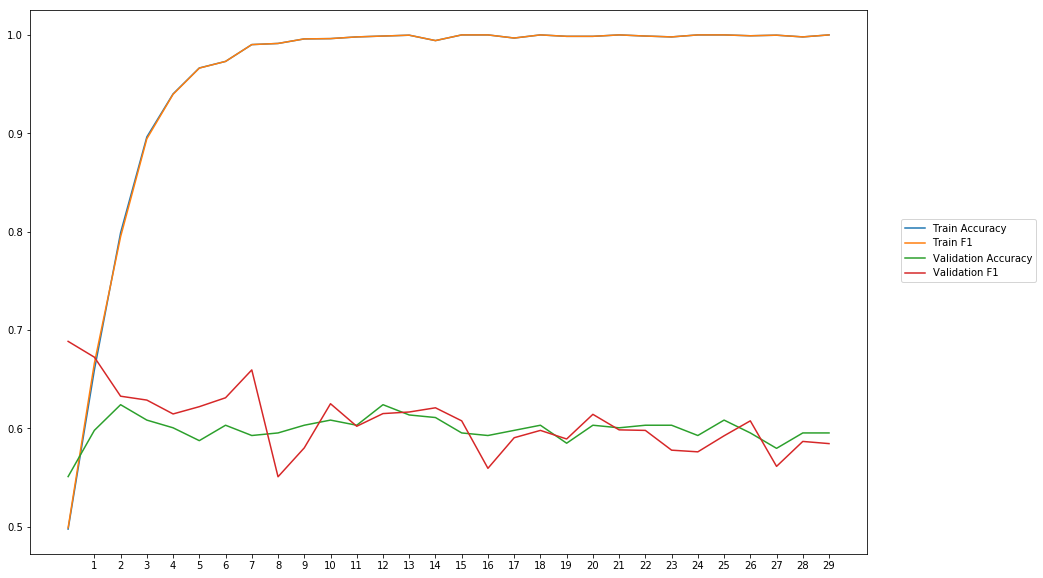

Average Accuracy: 59.91%
Average Precision: 59.91%
Average Recall: 62.40%
Average F1: 60.67%

-----Fold 5--------


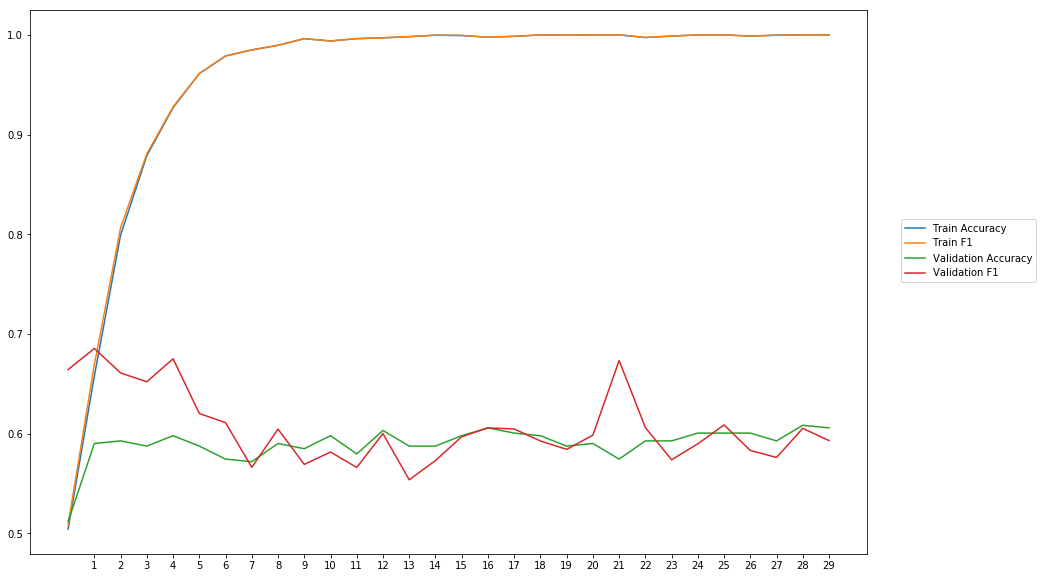

Average Accuracy: 58.97%
Average Precision: 58.77%
Average Recall: 63.92%
Average F1: 60.58%

-----Fold 6--------


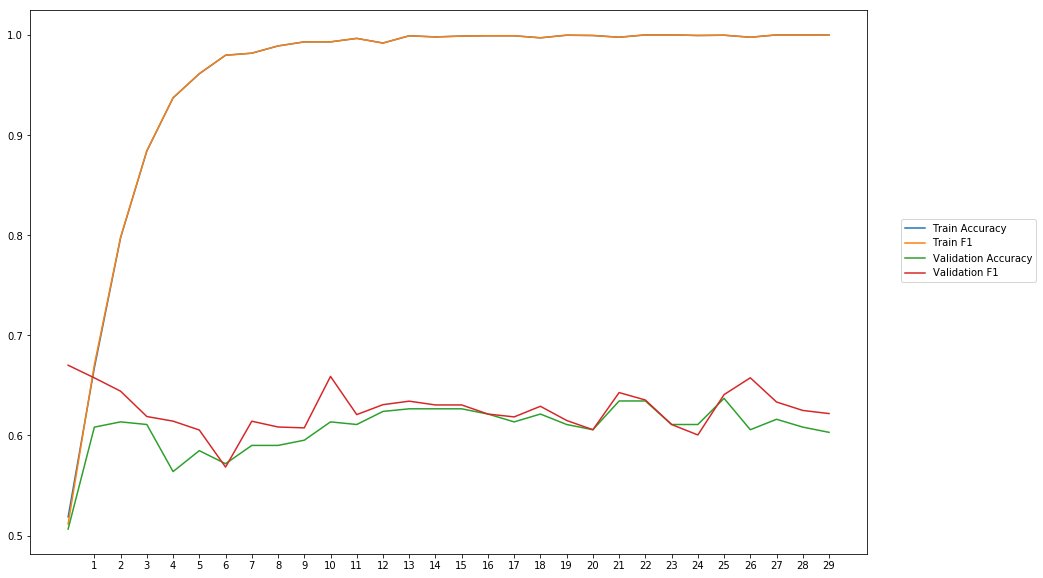

Average Accuracy: 60.66%
Average Precision: 60.13%
Average Recall: 65.92%
Average F1: 62.58%

-----Fold 7--------


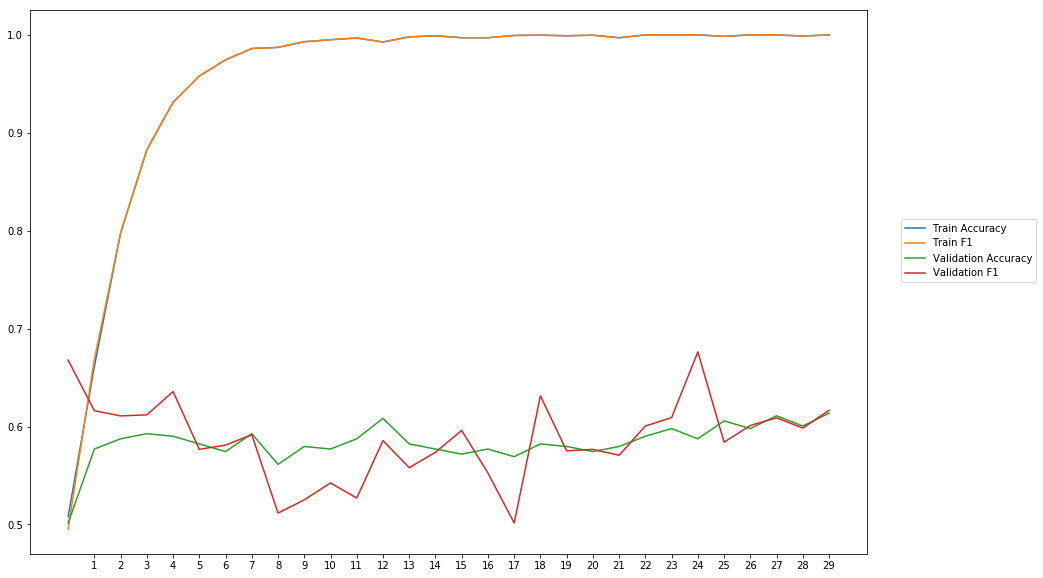

Average Accuracy: 58.36%
Average Precision: 58.67%
Average Recall: 60.07%
Average F1: 58.71%

-----Fold 8--------


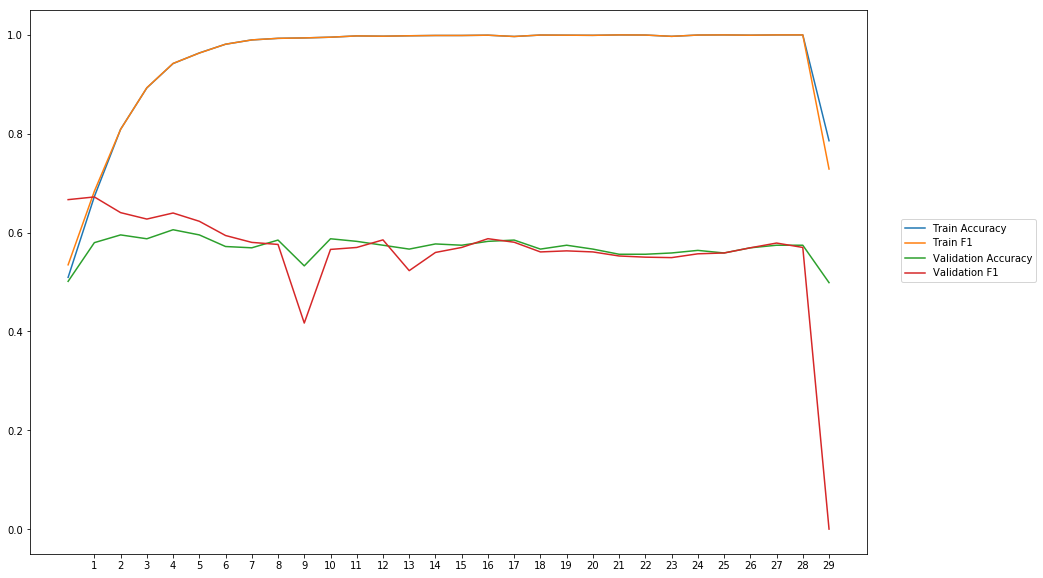

Average Accuracy: 56.90%
Average Precision: 55.28%
Average Recall: 57.55%
Average F1: 55.83%

-----Fold 9--------


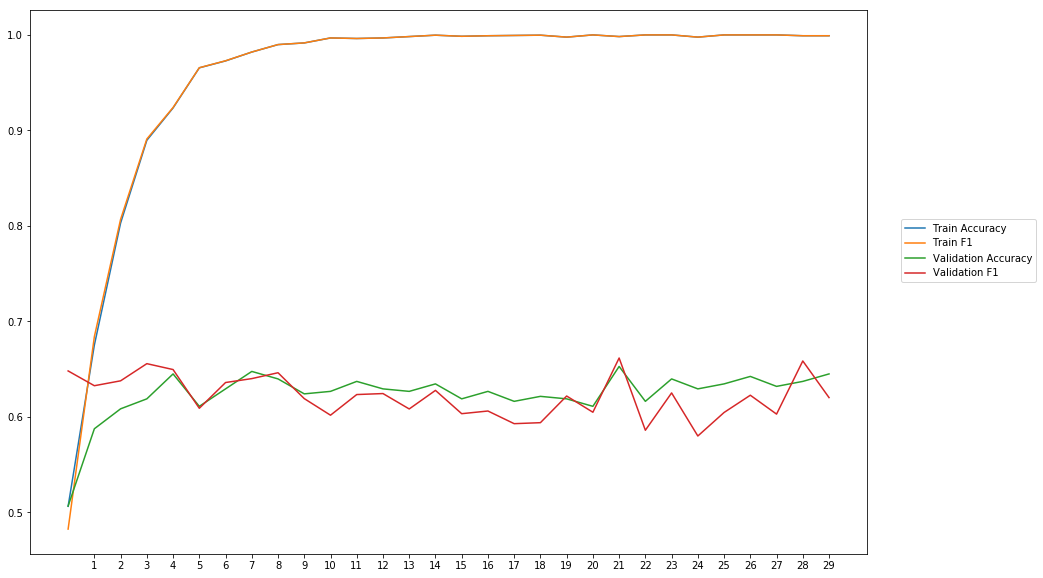

Average Accuracy: 62.38%
Average Precision: 63.17%
Average Recall: 61.93%
Average F1: 62.14%

-----Fold 10--------


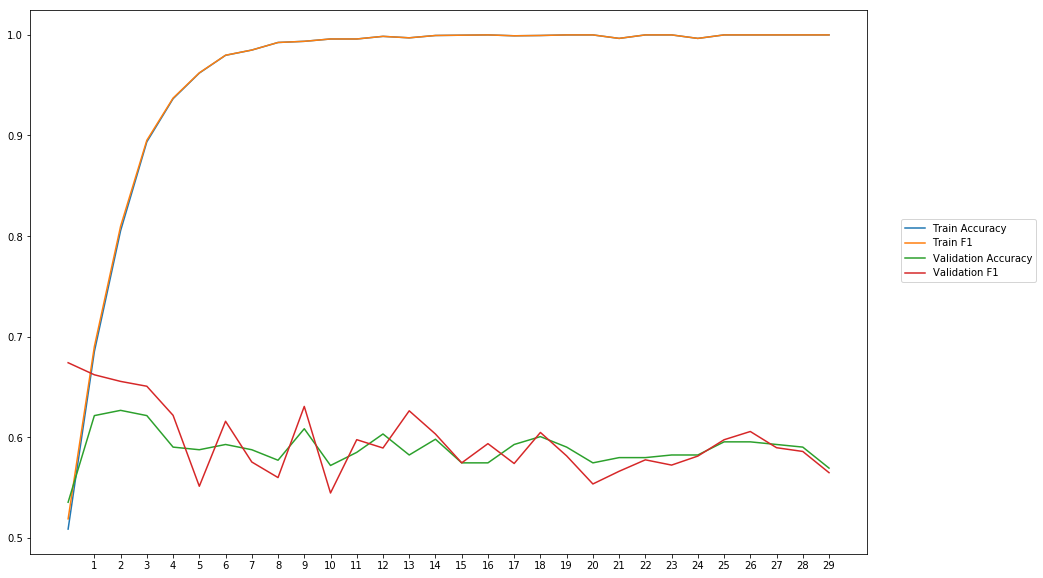

Average Accuracy: 58.87%
Average Precision: 58.80%
Average Recall: 61.11%
Average F1: 59.59%

-------Overallresults-------


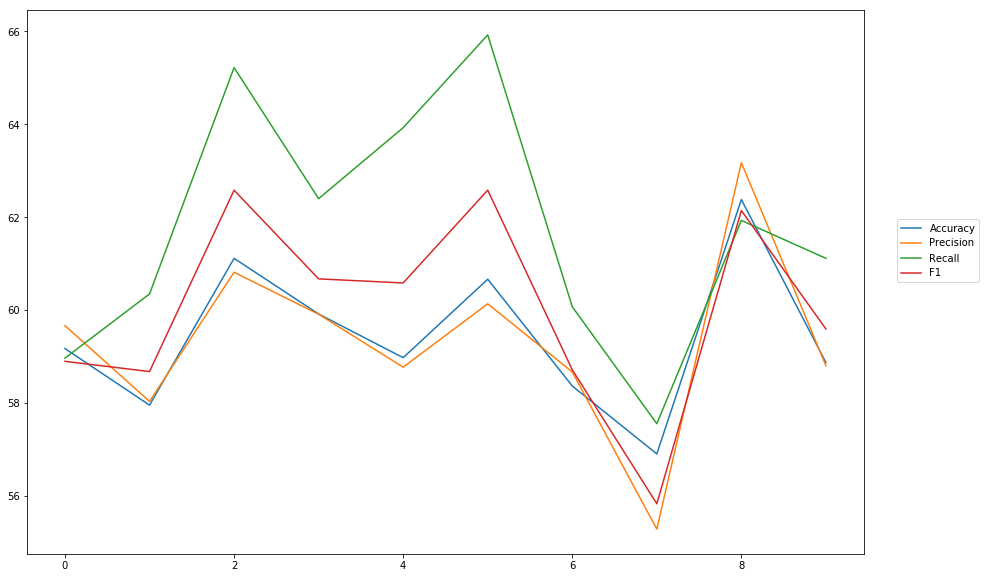

Accuracy: Mean = 59.43% (+/- 1.54%), Max = 62.38%, Min =  56.90%
Precision: Mean = 59.32% (+/- 1.93%), Max = 63.17%, Min =  55.28%
Recall: Mean = 61.74% (+/- 2.55%), Max = 65.92%, Min =  57.55%
F1: Mean = 60.02% (+/- 2.02%), Max = 62.58%, Min =  55.83%


In [9]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_2_400')  

## AttentiveLSTM two LSTM-layers, first 400 neurons, second 300

In [ ]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#LSTM Layer
x3 = LSTM(400, activation='tanh', return_sequences=True, recurrent_activation='sigmoid')(embedded_sequences3)
x3 = LSTM(300, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(x3)

#Attention Layer
x3 = Attention()(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


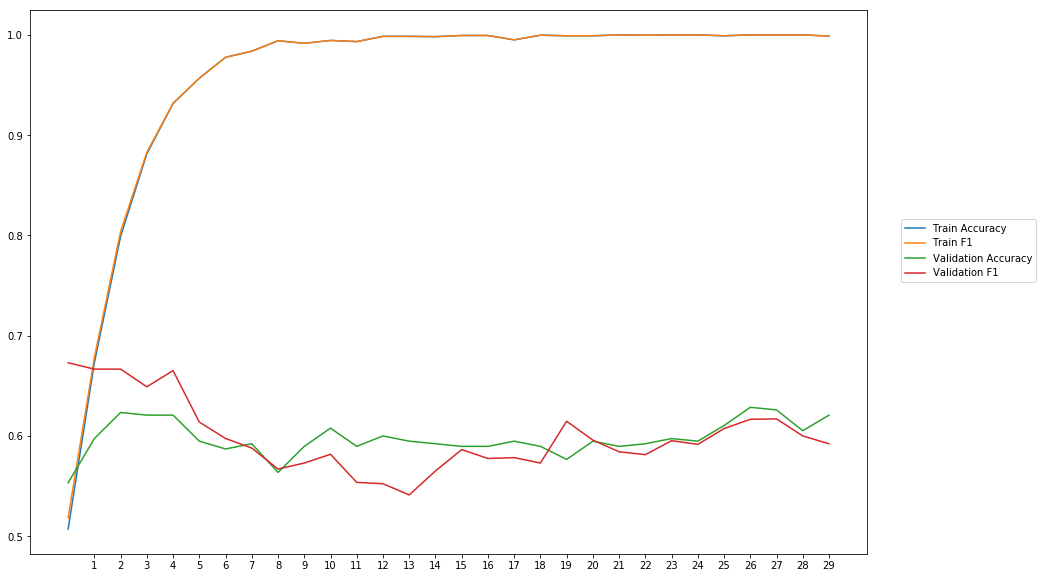

Average Accuracy: 59.76%
Average Precision: 60.04%
Average Recall: 60.64%
Average F1: 59.88%

-----Fold 2--------


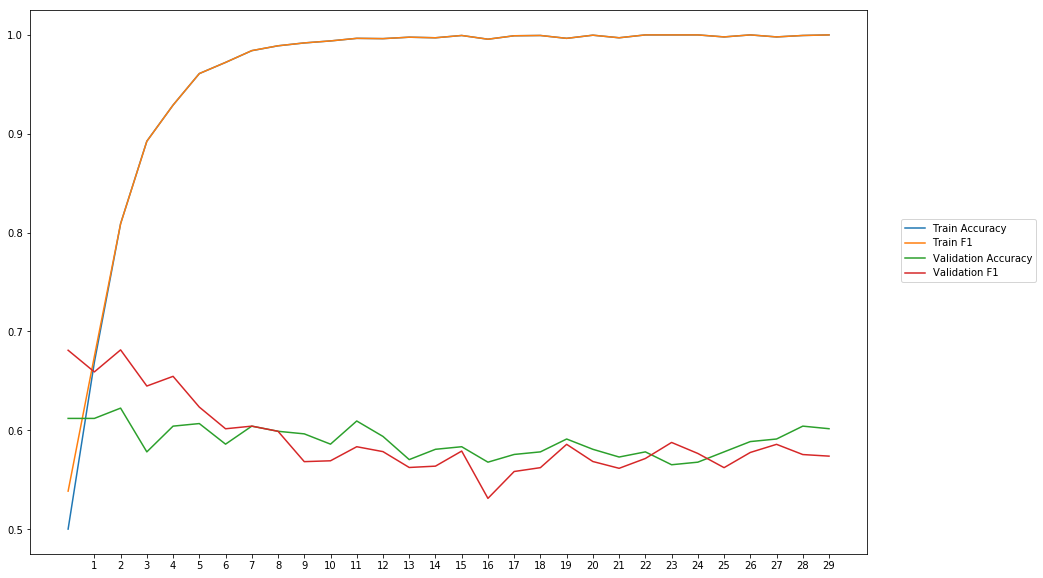

Average Accuracy: 58.95%
Average Precision: 59.19%
Average Recall: 59.69%
Average F1: 59.10%

-----Fold 3--------


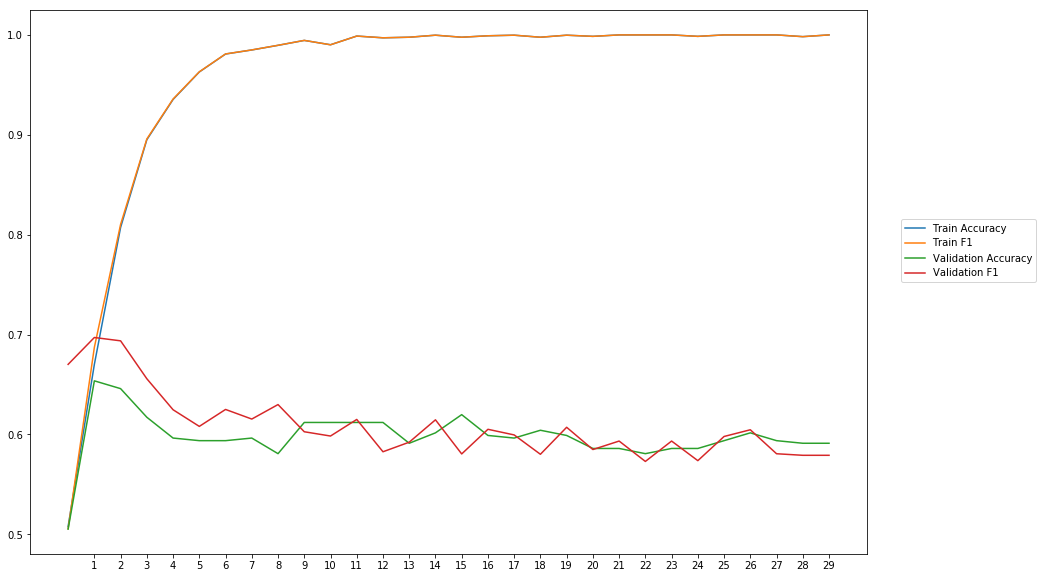

Average Accuracy: 59.79%
Average Precision: 59.83%
Average Recall: 62.85%
Average F1: 60.86%

-----Fold 4--------


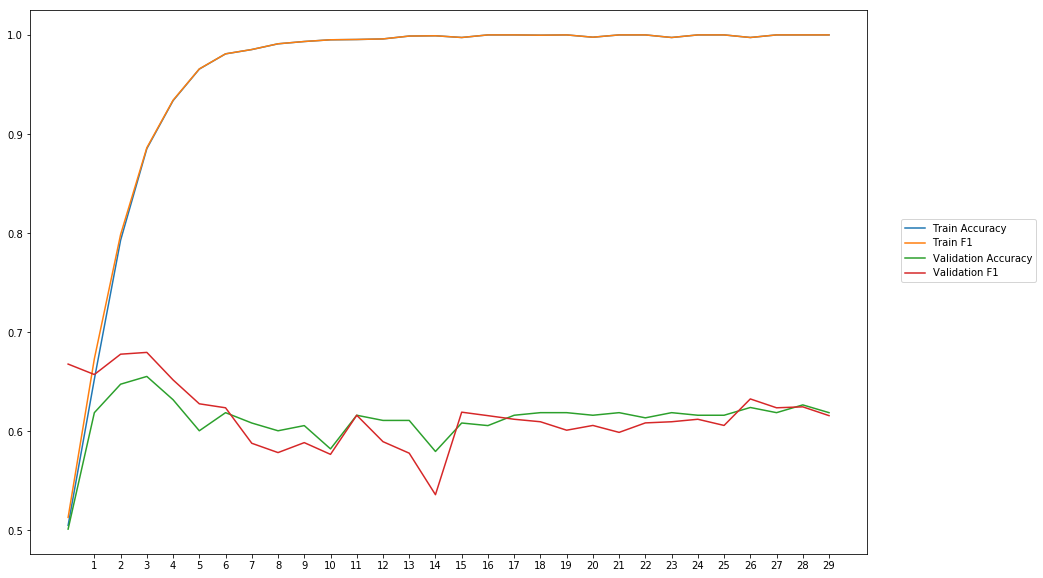

Average Accuracy: 61.15%
Average Precision: 61.42%
Average Recall: 62.31%
Average F1: 61.44%

-----Fold 5--------


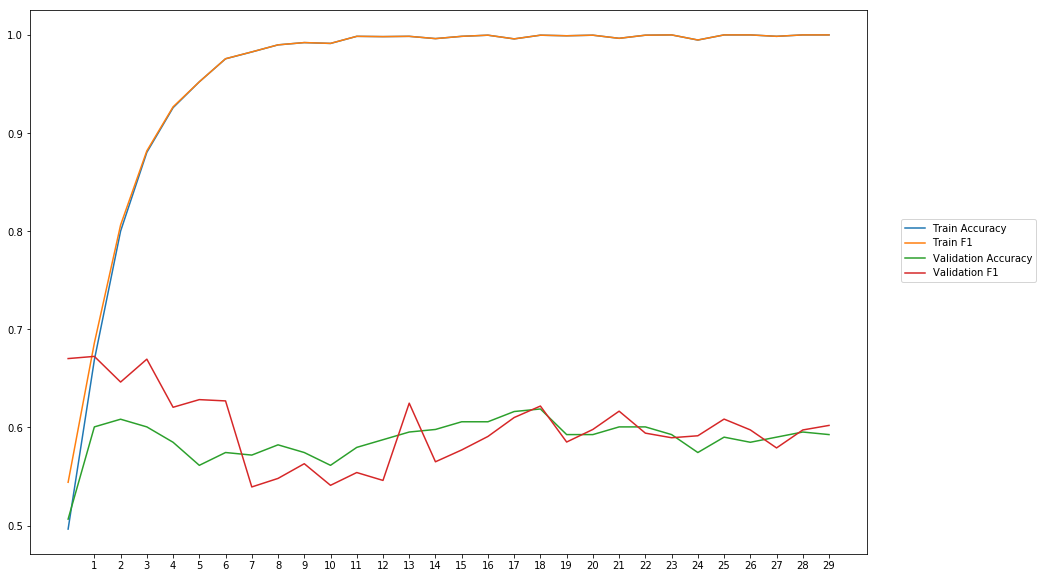

Average Accuracy: 58.80%
Average Precision: 58.78%
Average Recall: 62.33%
Average F1: 59.91%

-----Fold 6--------


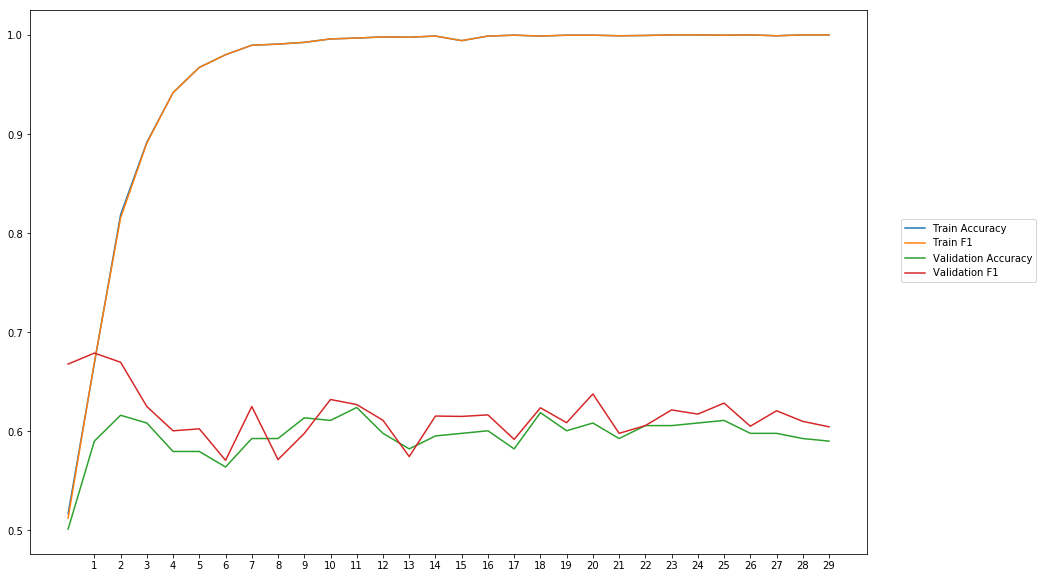

Average Accuracy: 59.53%
Average Precision: 59.00%
Average Recall: 65.19%
Average F1: 61.58%

-----Fold 7--------


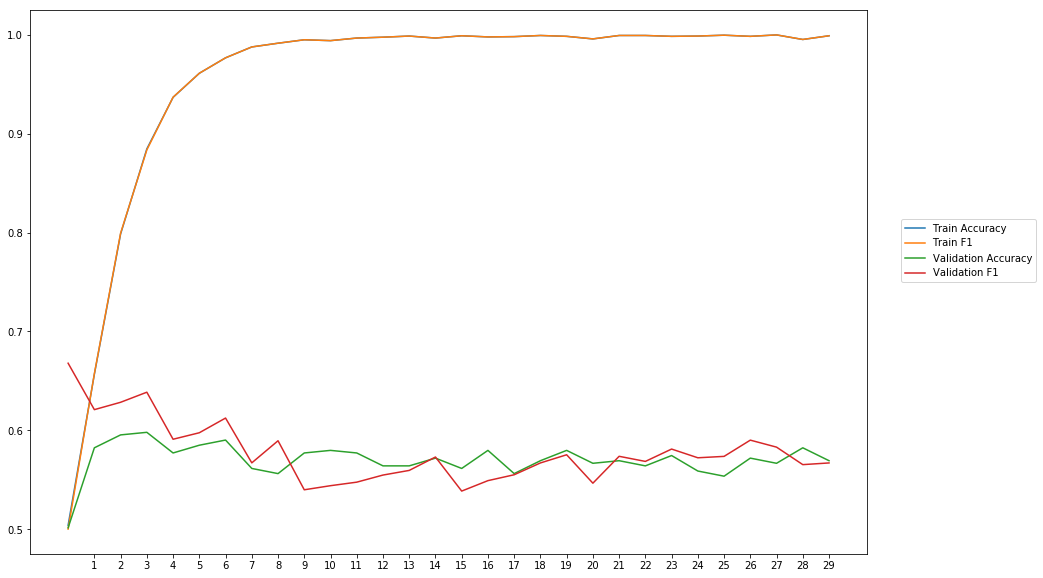

Average Accuracy: 57.01%
Average Precision: 57.09%
Average Recall: 59.32%
Average F1: 57.79%

-----Fold 8--------


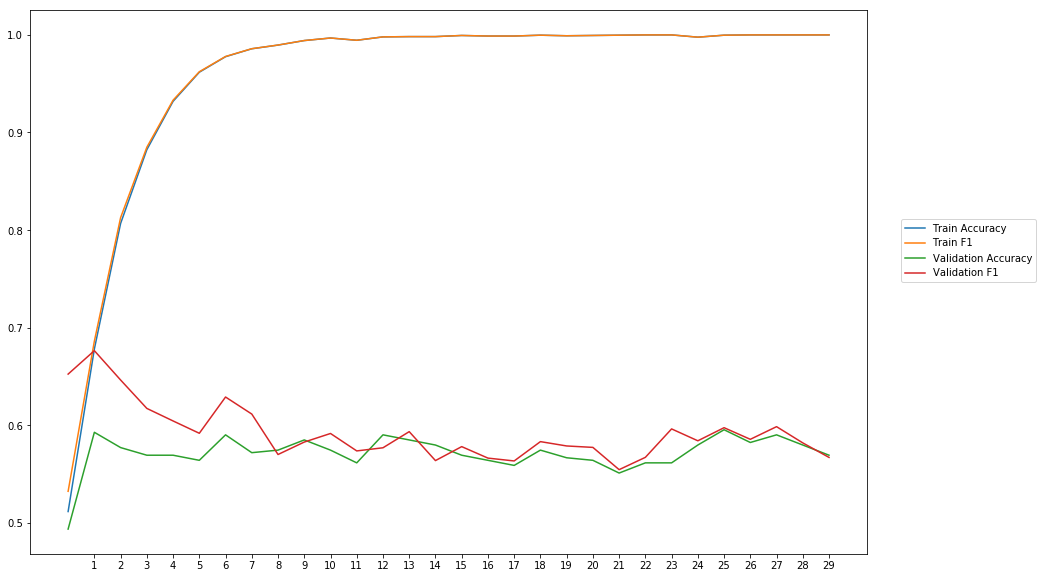

Average Accuracy: 57.15%
Average Precision: 56.81%
Average Recall: 62.57%
Average F1: 59.19%

-----Fold 9--------


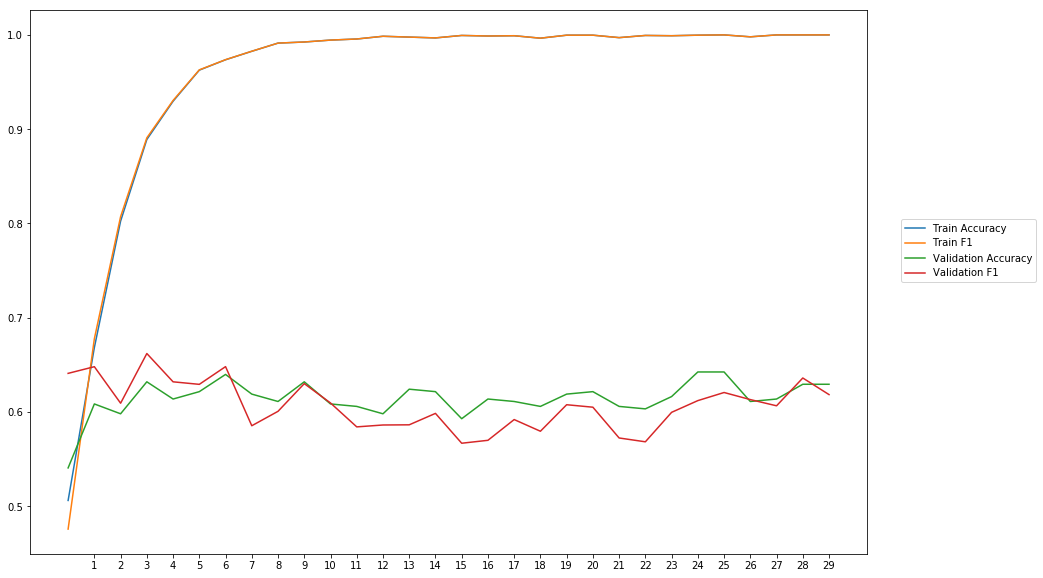

Average Accuracy: 61.43%
Average Precision: 62.26%
Average Recall: 59.81%
Average F1: 60.71%

-----Fold 10--------


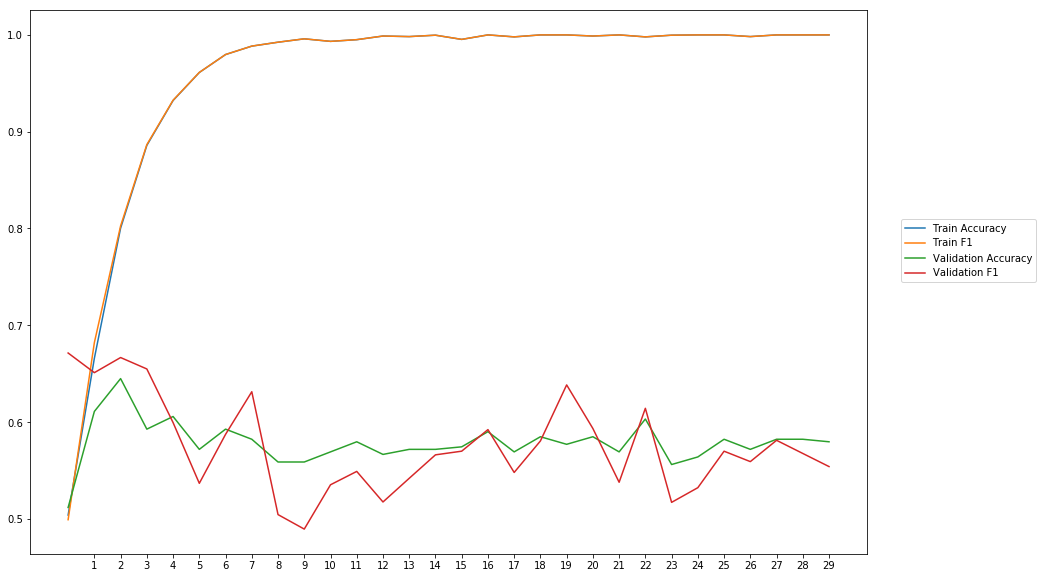

Average Accuracy: 57.87%
Average Precision: 58.24%
Average Recall: 58.04%
Average F1: 57.53%

-------Overallresults-------


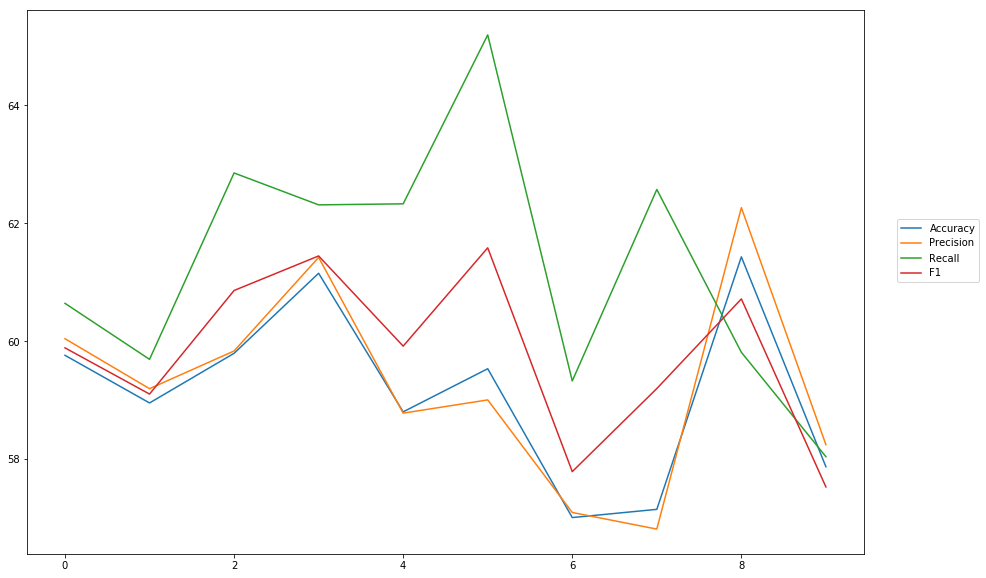

Accuracy: Mean = 59.14% (+/- 1.43%), Max = 61.43%, Min =  57.01%
Precision: Mean = 59.27% (+/- 1.63%), Max = 62.26%, Min =  56.81%
Recall: Mean = 61.27% (+/- 2.03%), Max = 65.19%, Min =  58.04%
F1: Mean = 59.80% (+/- 1.34%), Max = 61.58%, Min =  57.53%


In [10]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_2_400_300')  

## AttentiveLSTM one LSTM-layers, 500 neurons

In [ ]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#LSTM Layer
x4 = LSTM(500, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences4)

#Attention Layer
x4 = Attention()(x4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)


-----Fold 1--------


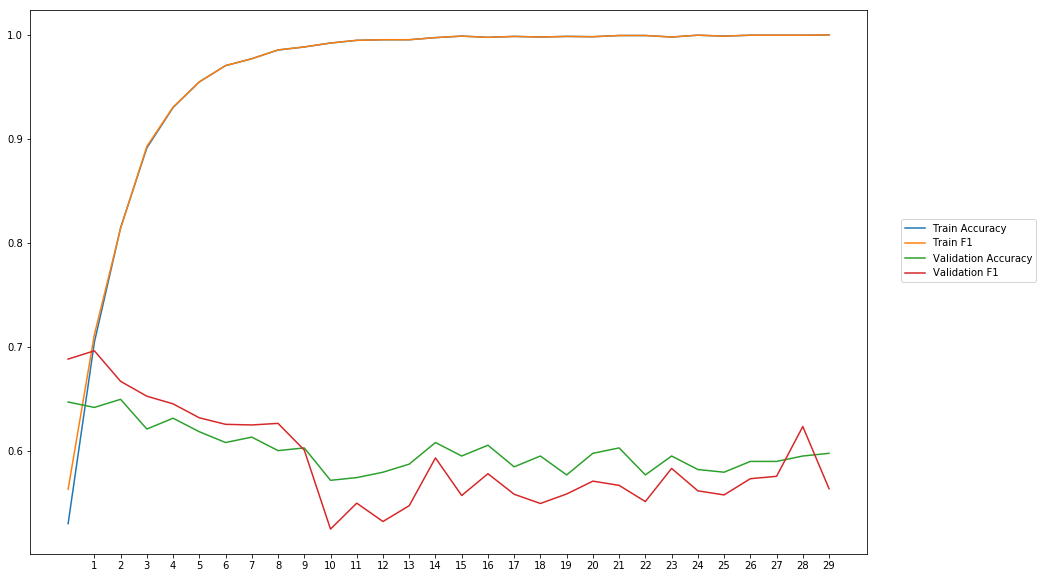

Average Accuracy: 60.03%
Average Precision: 60.51%
Average Recall: 58.34%
Average F1: 59.09%

-----Fold 2--------


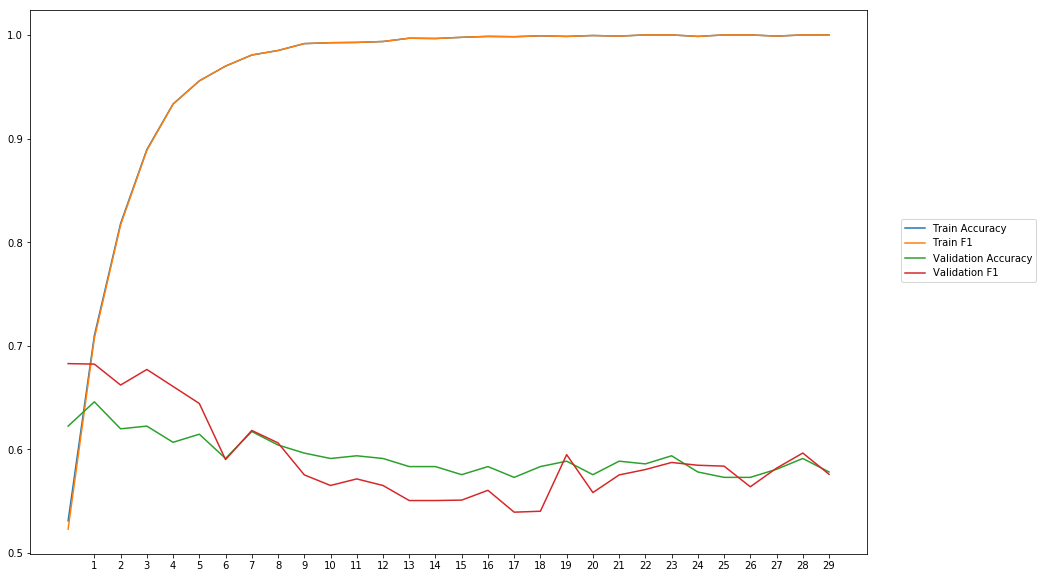

Average Accuracy: 59.35%
Average Precision: 59.58%
Average Recall: 59.55%
Average F1: 59.25%

-----Fold 3--------


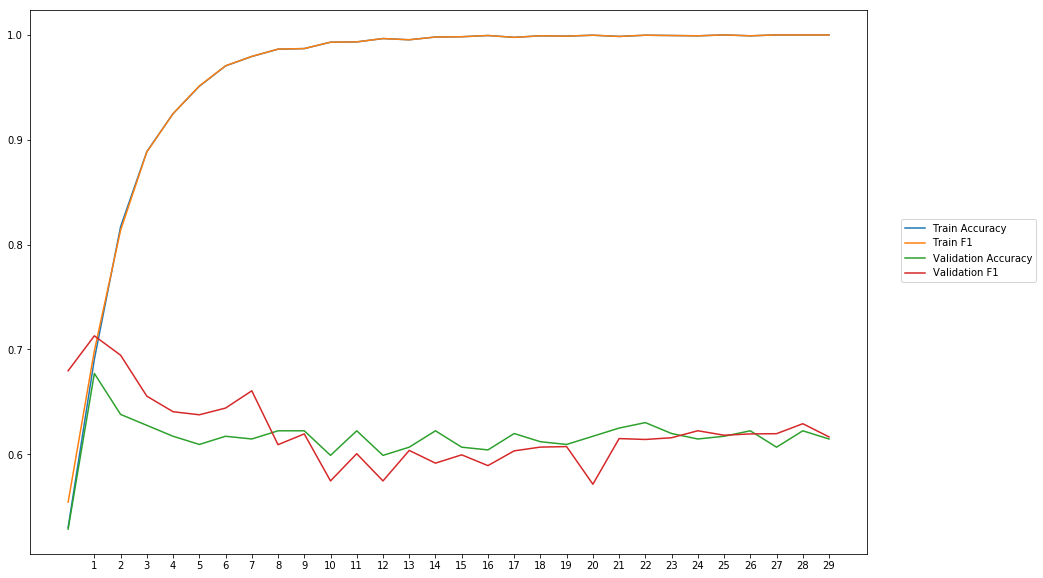

Average Accuracy: 61.55%
Average Precision: 61.76%
Average Recall: 63.54%
Average F1: 62.16%

-----Fold 4--------


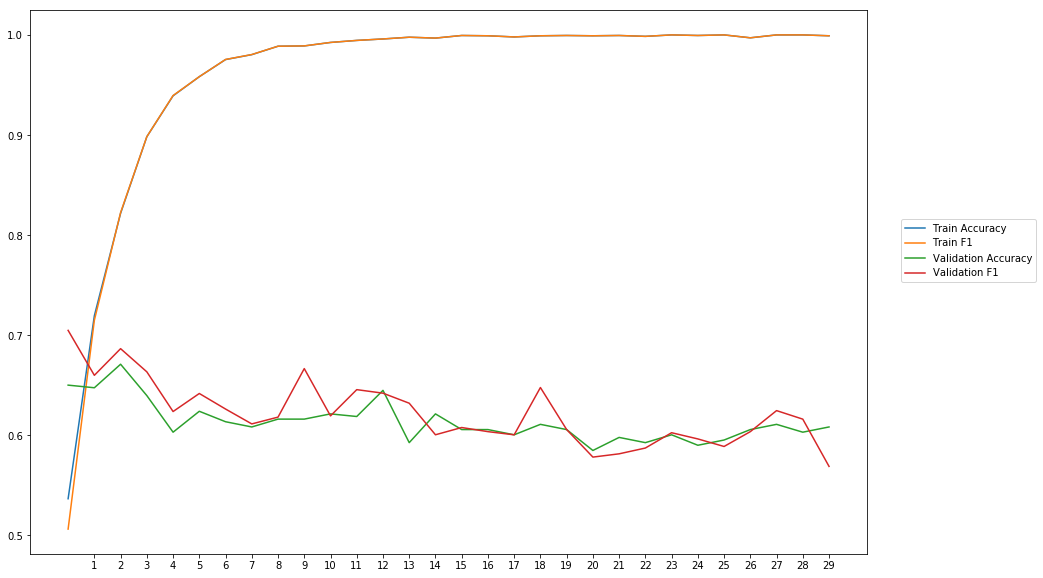

Average Accuracy: 61.36%
Average Precision: 61.01%
Average Recall: 63.78%
Average F1: 62.19%

-----Fold 5--------


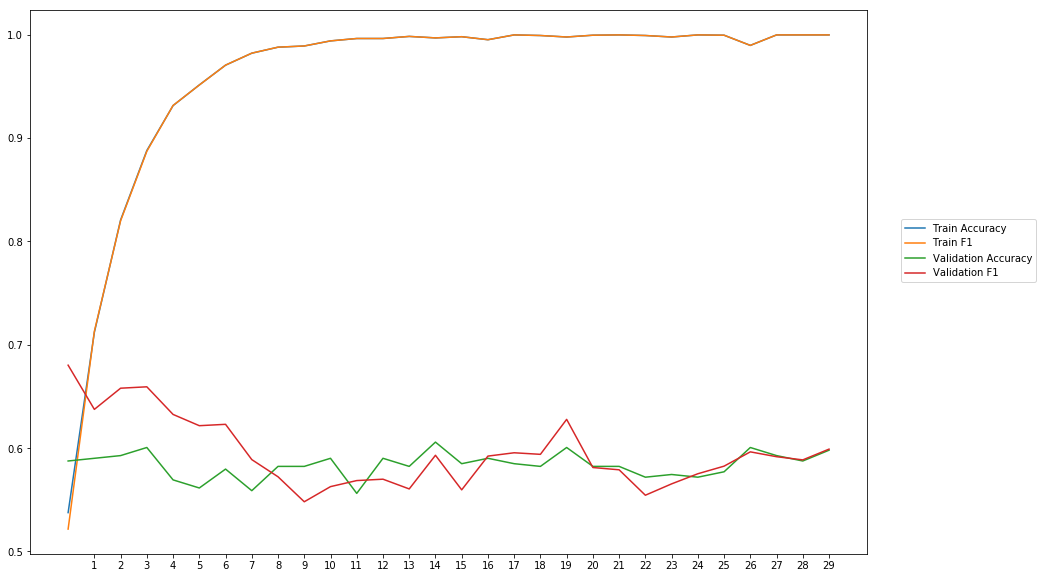

Average Accuracy: 58.36%
Average Precision: 58.16%
Average Recall: 61.74%
Average F1: 59.52%

-----Fold 6--------


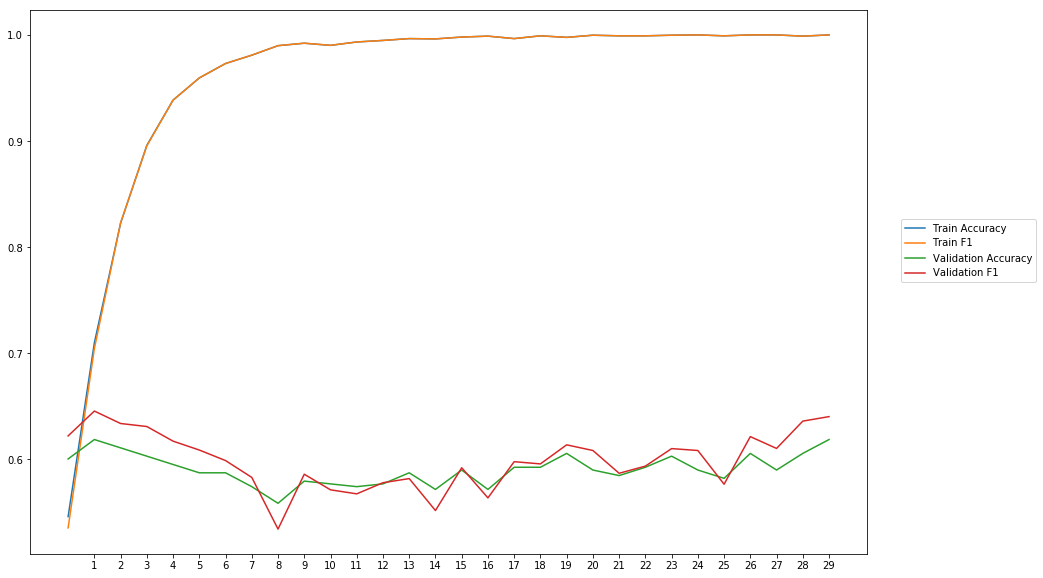

Average Accuracy: 59.07%
Average Precision: 58.79%
Average Recall: 61.20%
Average F1: 59.90%

-----Fold 7--------


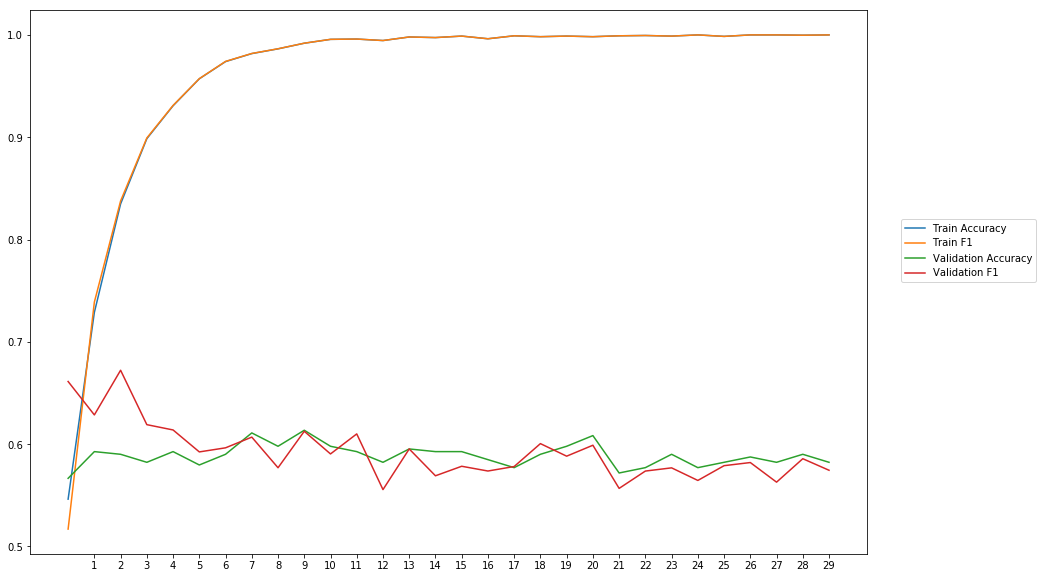

Average Accuracy: 58.89%
Average Precision: 59.00%
Average Recall: 60.07%
Average F1: 59.25%

-----Fold 8--------


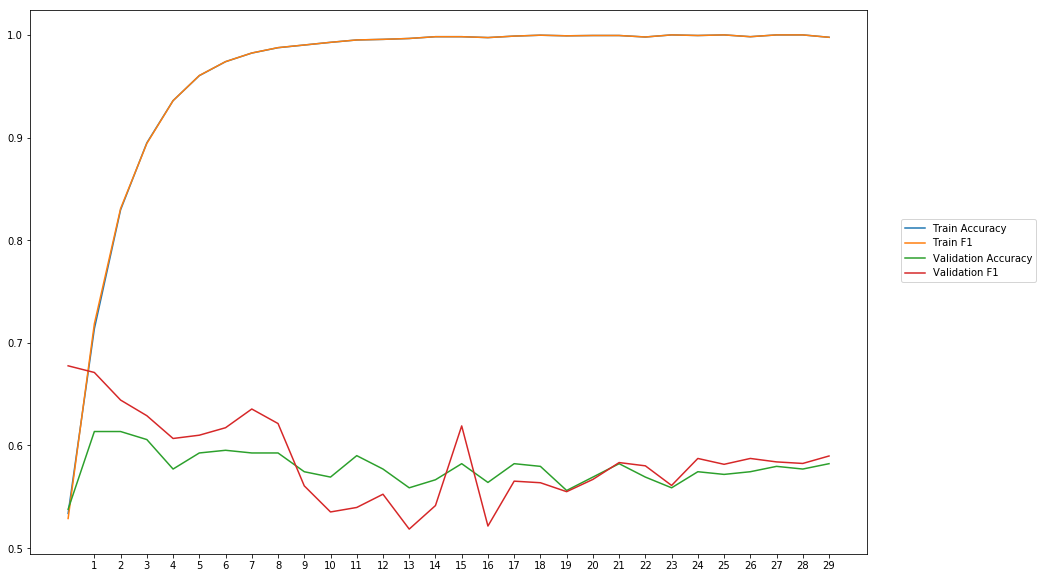

Average Accuracy: 57.87%
Average Precision: 57.78%
Average Recall: 60.40%
Average F1: 58.63%

-----Fold 9--------


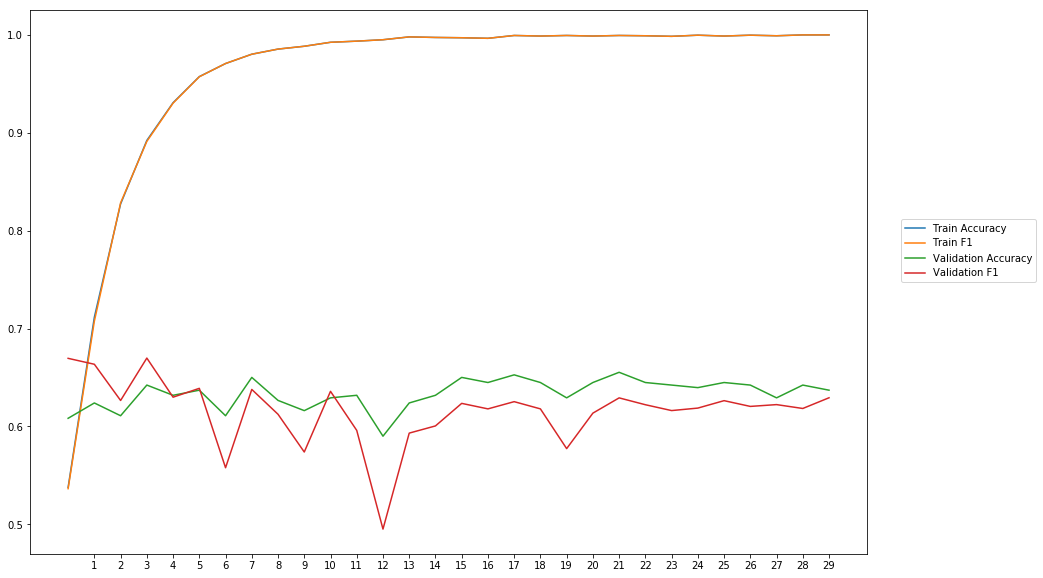

Average Accuracy: 63.37%
Average Precision: 65.05%
Average Recall: 59.13%
Average F1: 61.60%

-----Fold 10--------


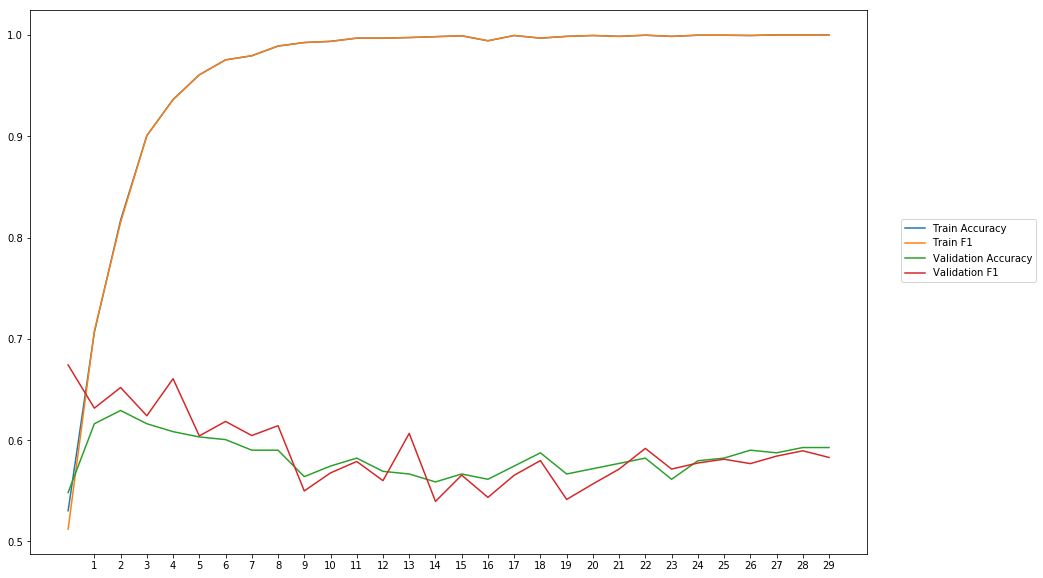

Average Accuracy: 58.30%
Average Precision: 58.25%
Average Recall: 60.10%
Average F1: 58.88%

-------Overallresults-------


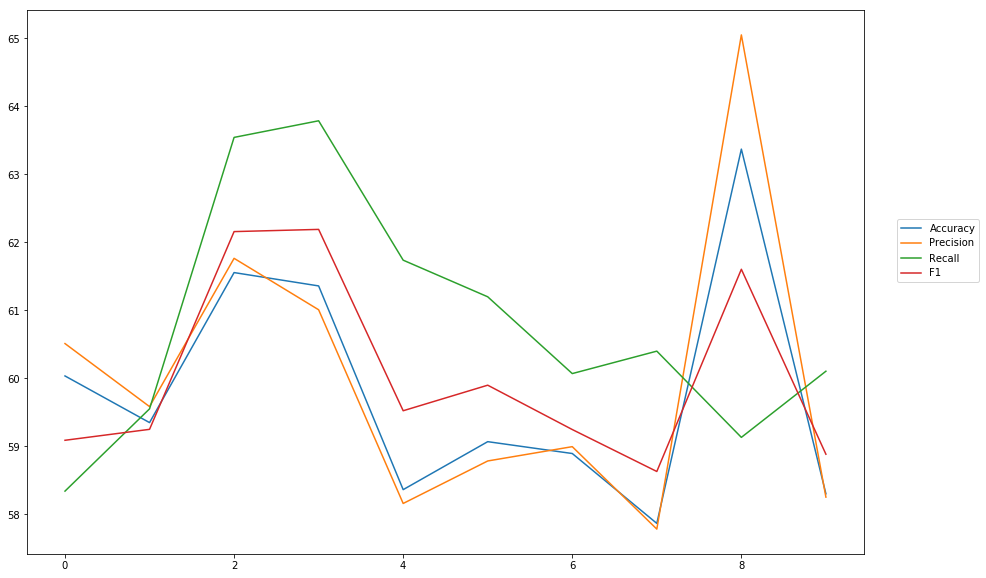

Accuracy: Mean = 59.82% (+/- 1.67%), Max = 63.37%, Min =  57.87%
Precision: Mean = 59.99% (+/- 2.09%), Max = 65.05%, Min =  57.78%
Recall: Mean = 60.79% (+/- 1.70%), Max = 63.78%, Min =  58.34%
F1: Mean = 60.05% (+/- 1.32%), Max = 62.19%, Min =  58.63%


In [11]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_500')  

## AttentiveLSTM one LSTM-layer, 600 neurons

In [8]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer5 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences5 = wv_layer5(comment_input5)

#LSTM Layer
x5 = LSTM(600, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences5)

#Attention Layer
x5 = Attention()(x5)

#Output (Dense) Layer
preds5 = Dense(2, activation='softmax')(x5)

# build the model
model5 = Model(inputs=[comment_input5], outputs=preds5)


-----Fold 1--------


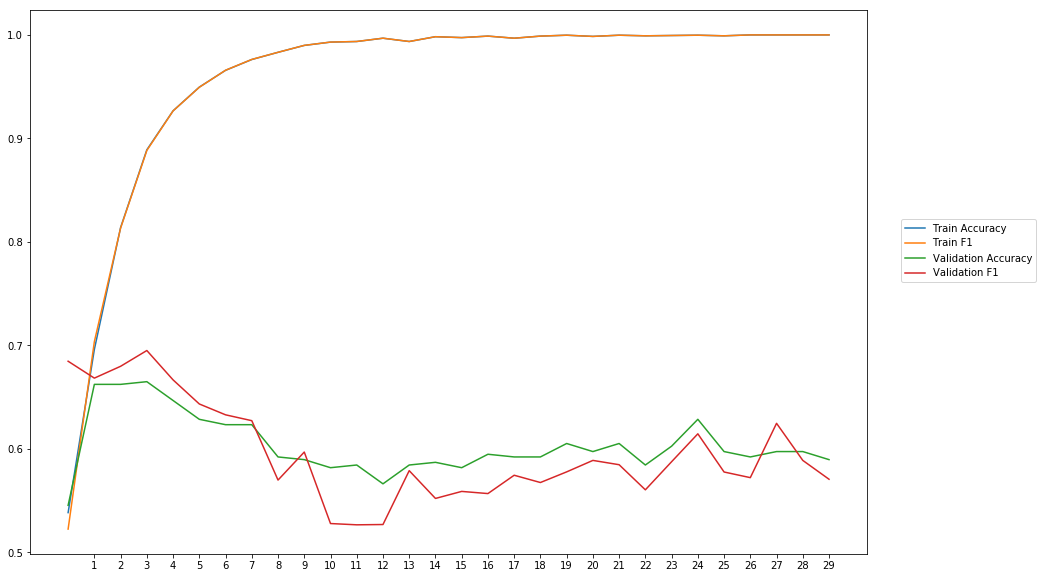

Average Accuracy: 60.34%
Average Precision: 60.89%
Average Recall: 59.26%
Average F1: 59.61%

-----Fold 2--------


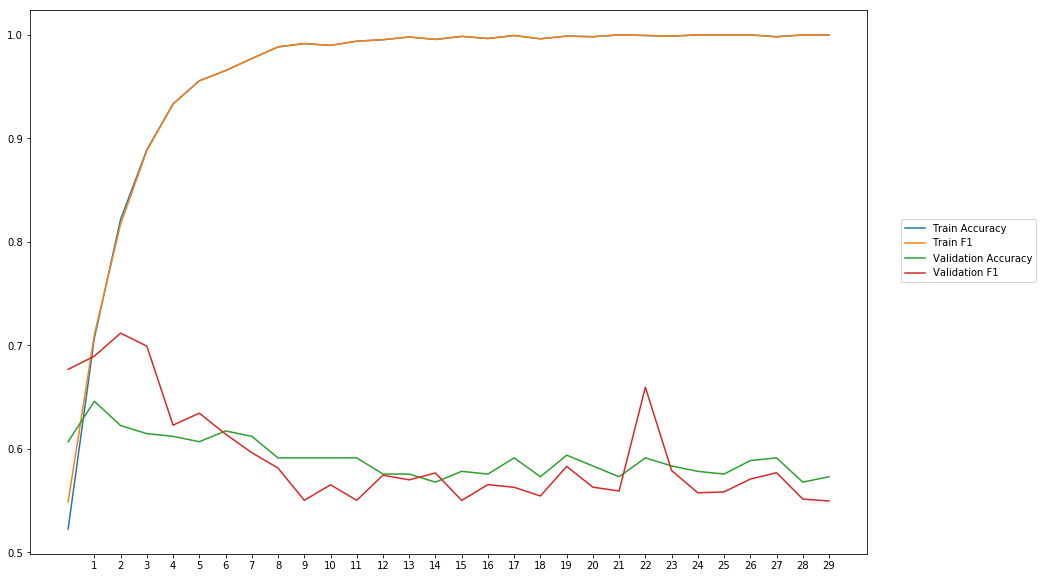

Average Accuracy: 59.12%
Average Precision: 59.33%
Average Recall: 60.10%
Average F1: 59.17%

-----Fold 3--------


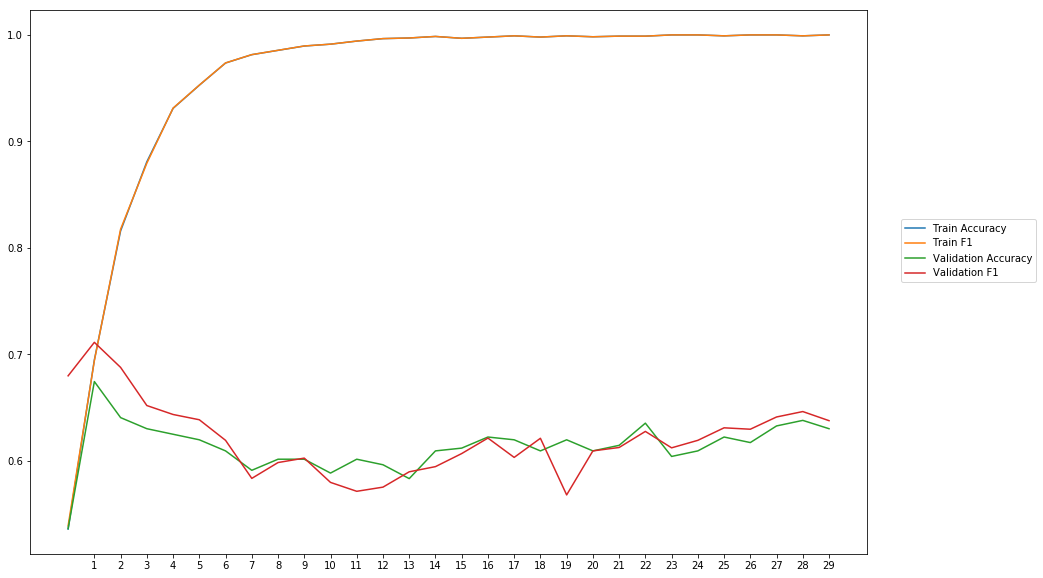

Average Accuracy: 61.35%
Average Precision: 61.42%
Average Recall: 63.47%
Average F1: 62.05%

-----Fold 4--------


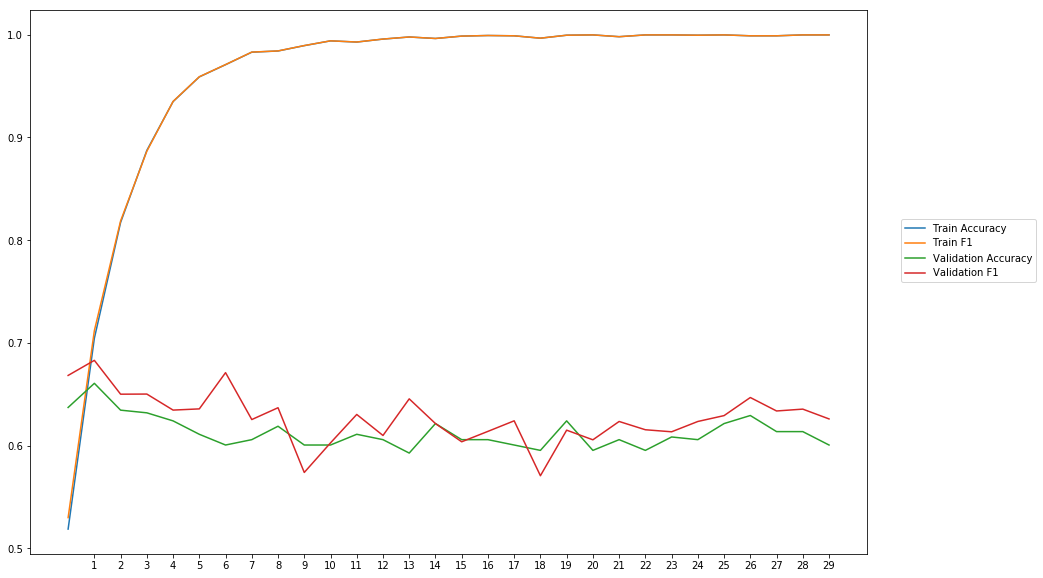

Average Accuracy: 61.25%
Average Precision: 60.60%
Average Recall: 65.30%
Average F1: 62.72%

-----Fold 5--------


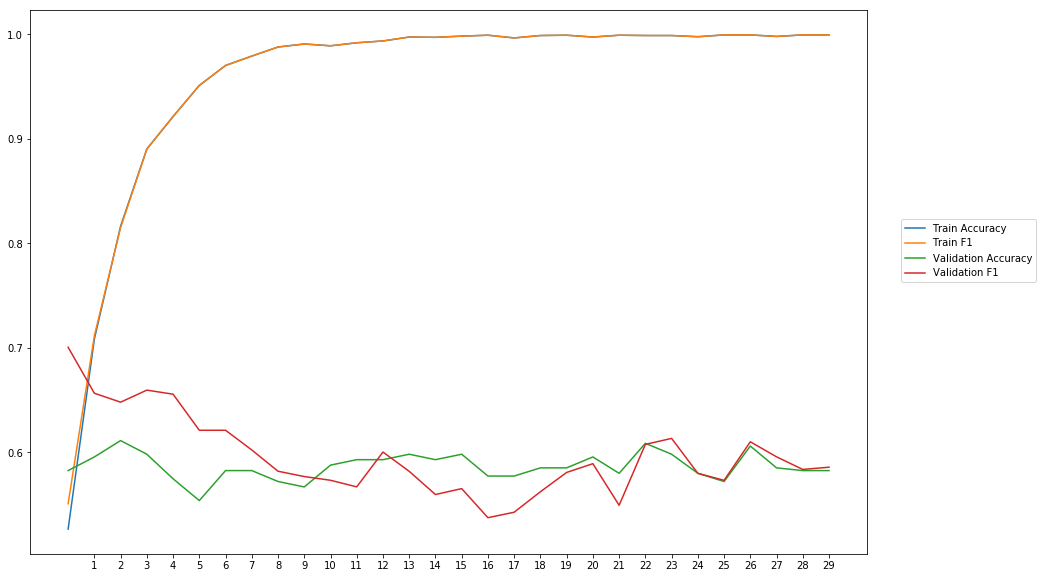

Average Accuracy: 58.63%
Average Precision: 58.54%
Average Recall: 61.74%
Average F1: 59.58%

-----Fold 6--------


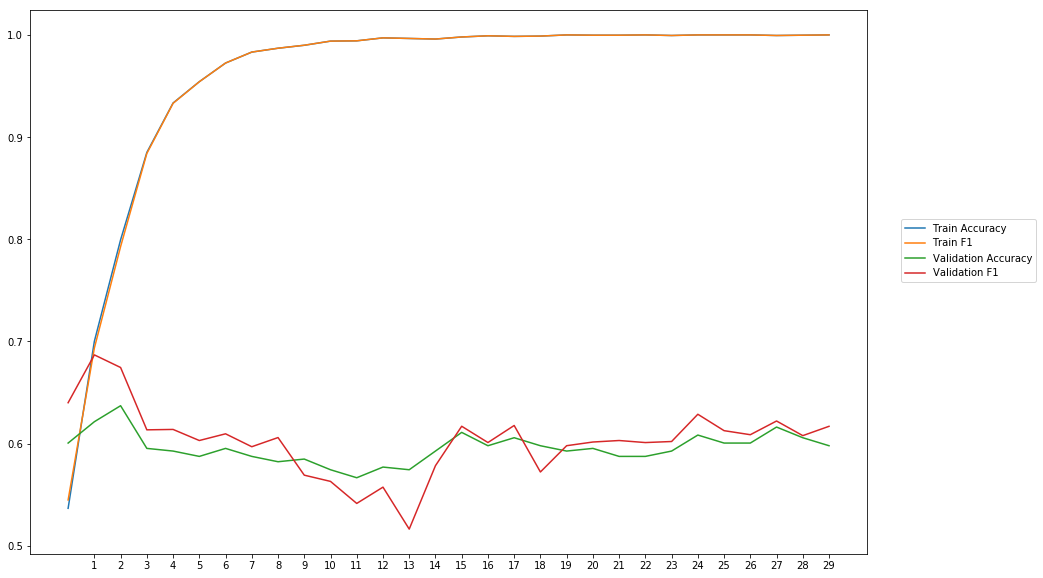

Average Accuracy: 59.56%
Average Precision: 59.31%
Average Recall: 61.65%
Average F1: 60.27%

-----Fold 7--------


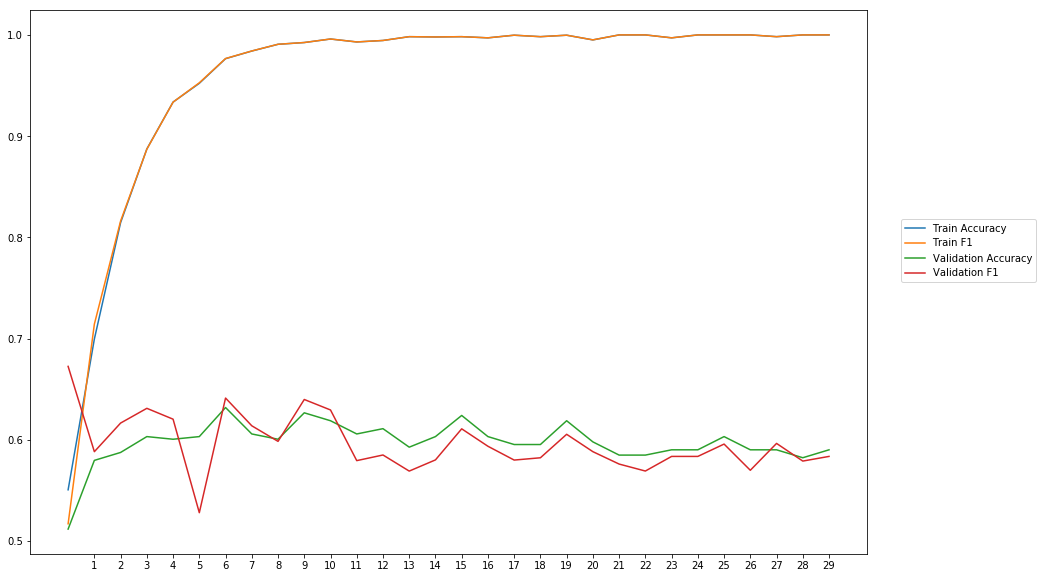

Average Accuracy: 59.74%
Average Precision: 60.26%
Average Recall: 59.86%
Average F1: 59.63%

-----Fold 8--------


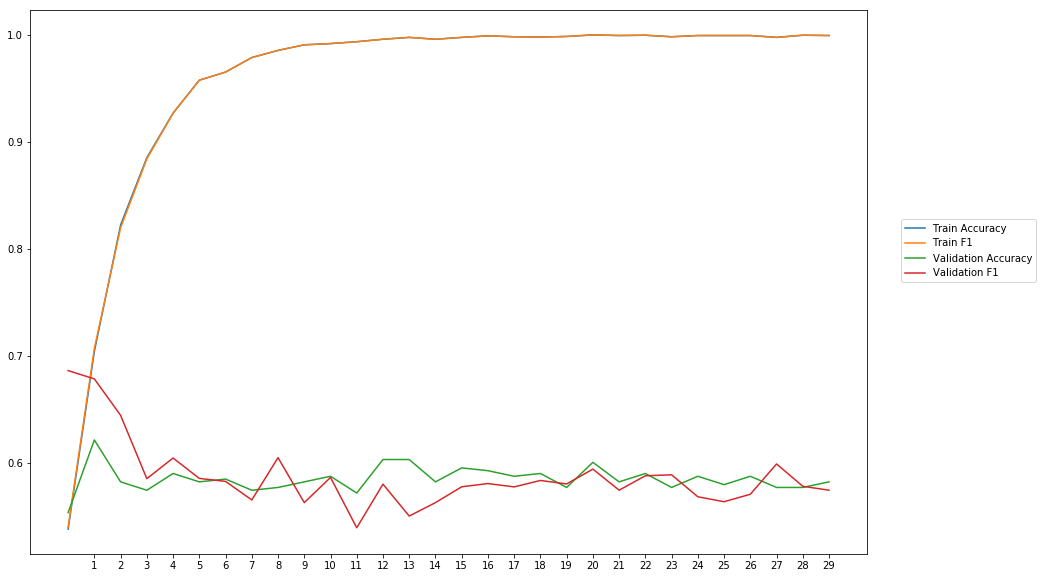

Average Accuracy: 58.51%
Average Precision: 58.73%
Average Recall: 59.57%
Average F1: 58.73%

-----Fold 9--------


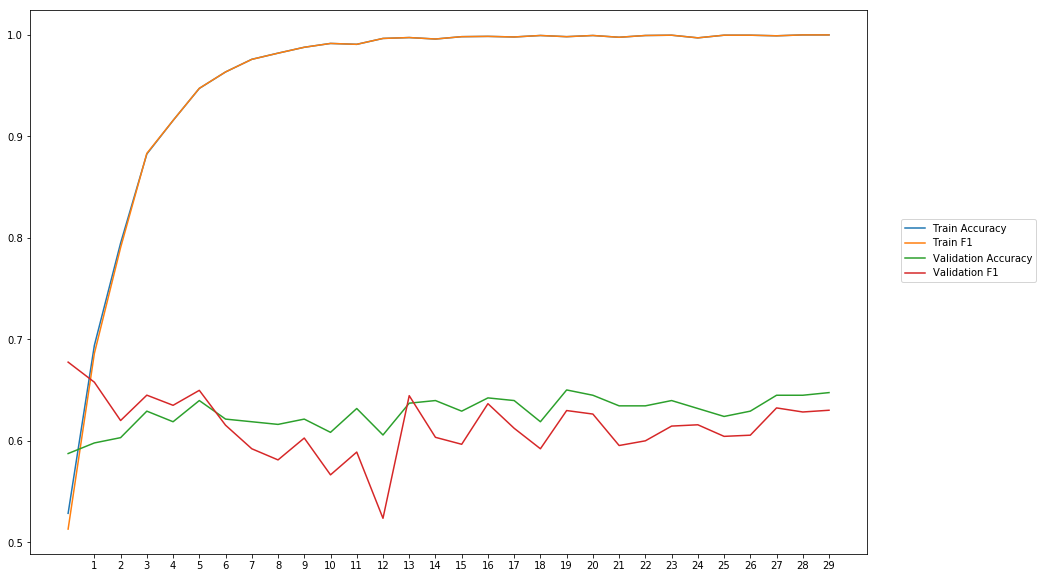

Average Accuracy: 62.78%
Average Precision: 64.21%
Average Recall: 59.62%
Average F1: 61.41%

-----Fold 10--------


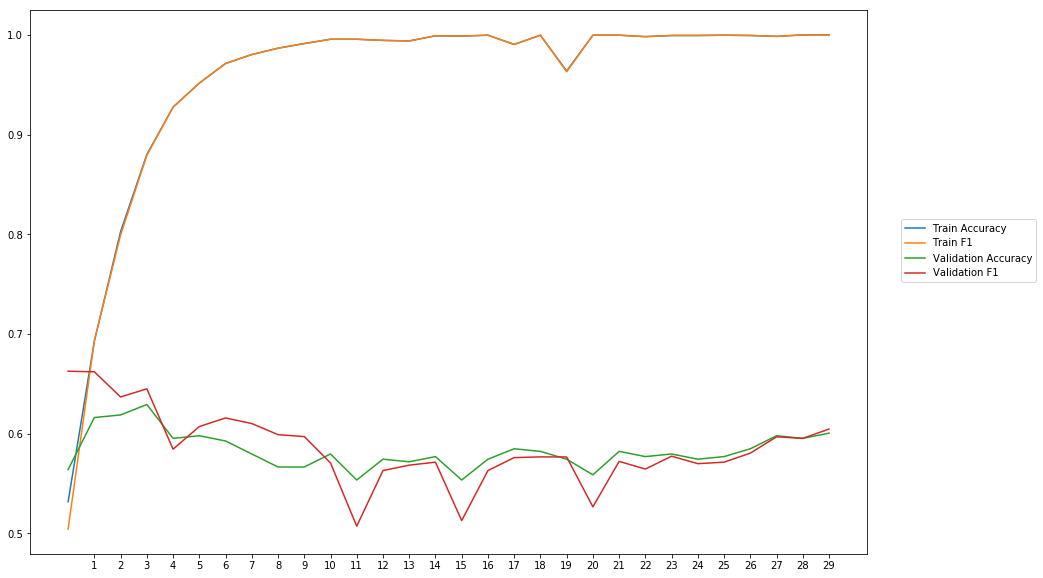

Average Accuracy: 58.27%
Average Precision: 58.28%
Average Recall: 59.32%
Average F1: 58.55%

-------Overallresults-------


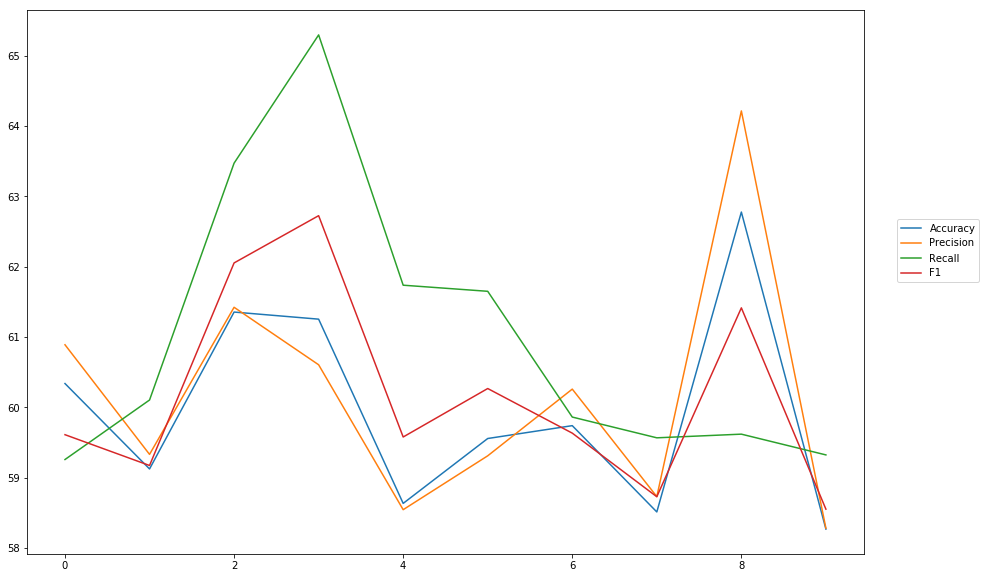

Accuracy: Mean = 59.96% (+/- 1.39%), Max = 62.78%, Min =  58.27%
Precision: Mean = 60.16% (+/- 1.68%), Max = 64.21%, Min =  58.28%
Recall: Mean = 60.99% (+/- 1.93%), Max = 65.30%, Min =  59.26%
F1: Mean = 60.17% (+/- 1.35%), Max = 62.72%, Min =  58.55%


In [13]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_600')  

## AttentiveLSTM one LSTM-layer, 700 neurons

In [ ]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences7 = wv_layer7(comment_input7)

#GRU Layer
x7 = LSTM(700, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences7)

#Attention Layer
x7 = Attention()(x7)

#Output (Dense) Layer
preds7 = Dense(2, activation='softmax')(x7)

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)


-----Fold 1--------


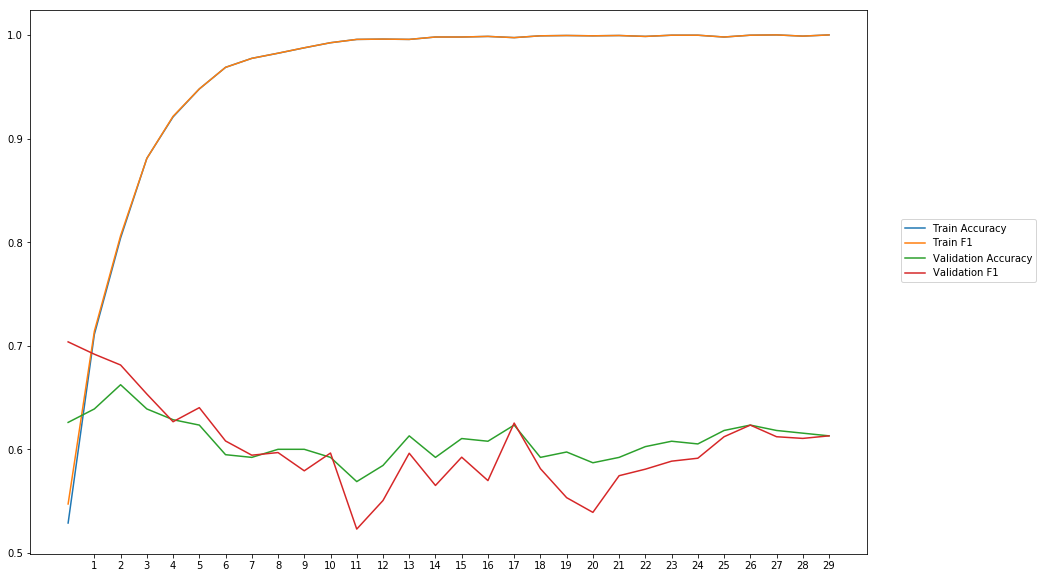

Average Accuracy: 60.90%
Average Precision: 61.32%
Average Recall: 59.81%
Average F1: 60.25%

-----Fold 2--------


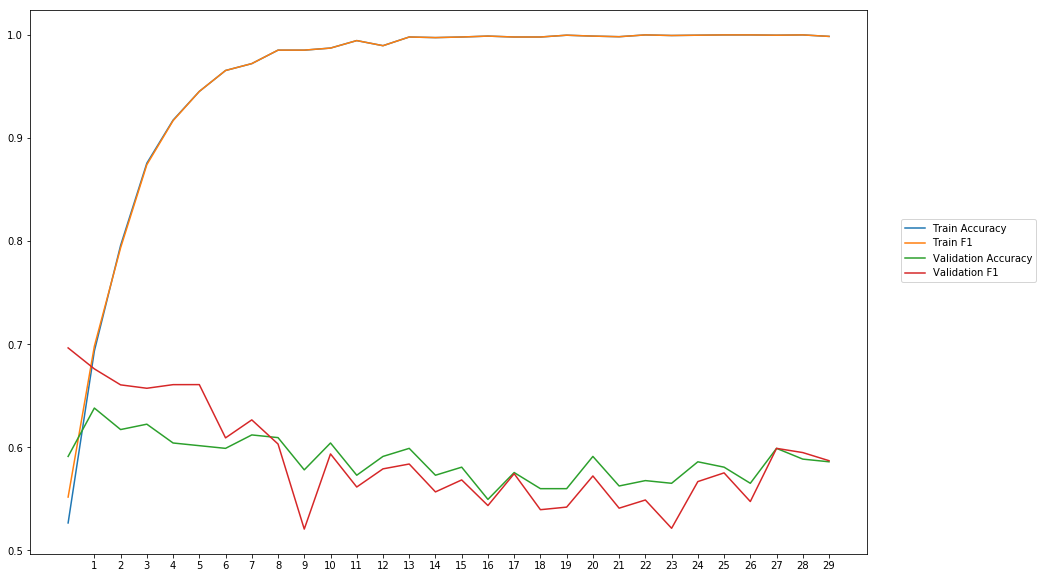

Average Accuracy: 58.77%
Average Precision: 58.91%
Average Recall: 59.72%
Average F1: 58.89%

-----Fold 3--------


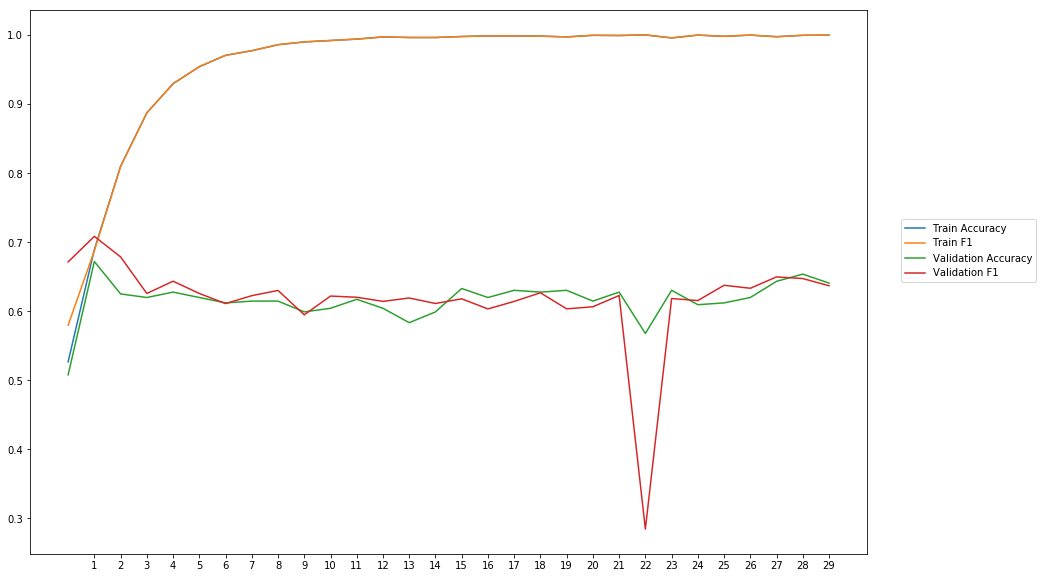

Average Accuracy: 61.60%
Average Precision: 62.55%
Average Recall: 63.20%
Average F1: 61.71%

-----Fold 4--------


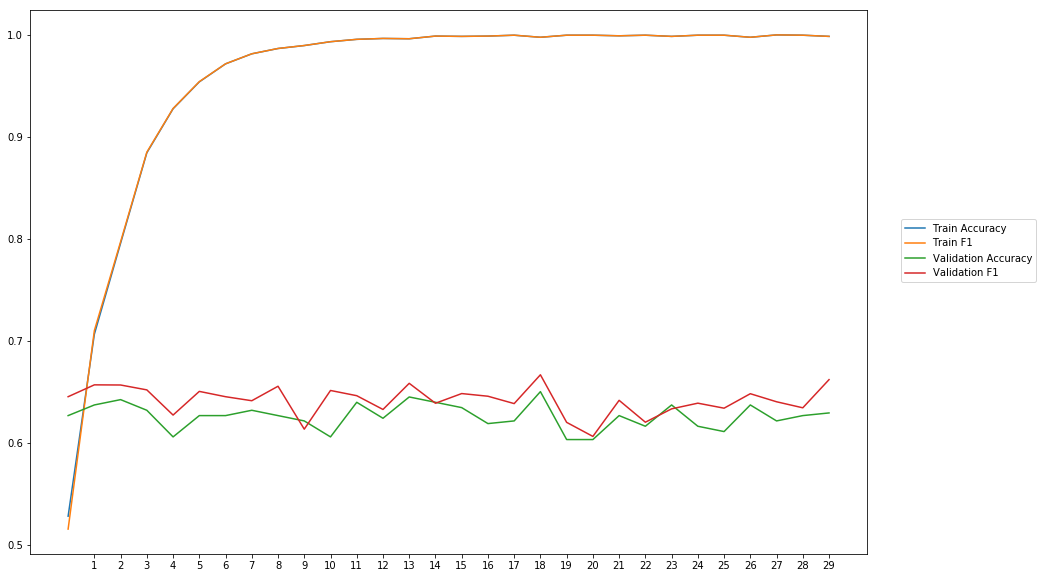

Average Accuracy: 62.61%
Average Precision: 61.79%
Average Recall: 66.82%
Average F1: 64.16%

-----Fold 5--------


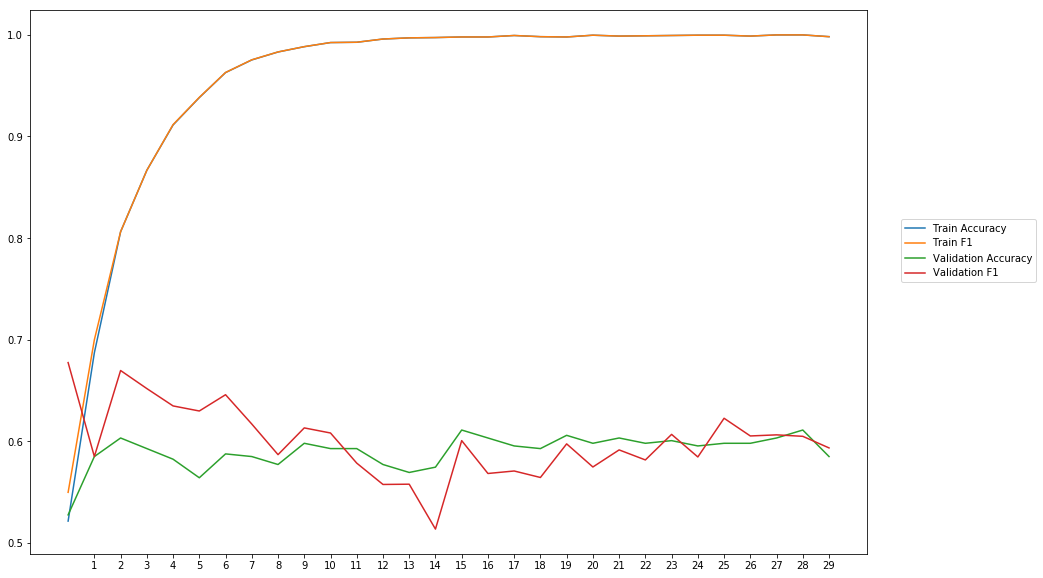

Average Accuracy: 59.02%
Average Precision: 59.03%
Average Recall: 62.15%
Average F1: 59.99%

-----Fold 6--------


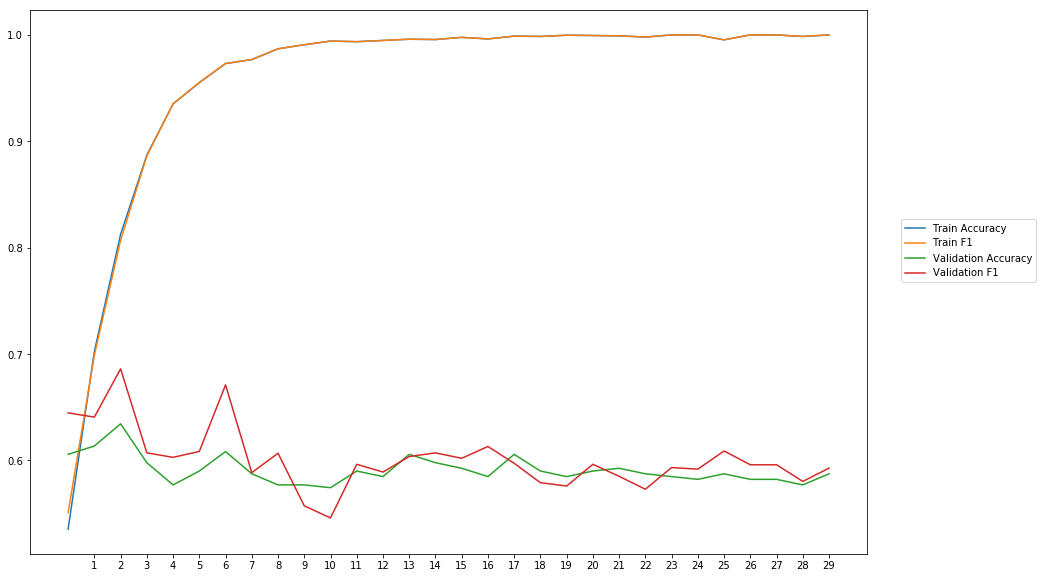

Average Accuracy: 59.11%
Average Precision: 58.78%
Average Recall: 61.86%
Average F1: 60.12%

-----Fold 7--------


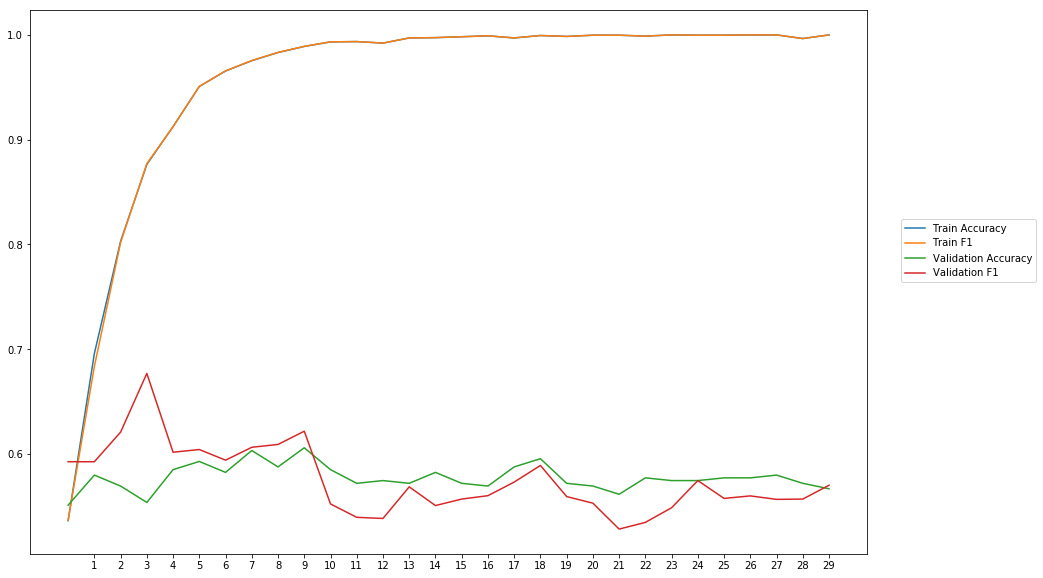

Average Accuracy: 57.73%
Average Precision: 58.09%
Average Recall: 57.59%
Average F1: 57.48%

-----Fold 8--------


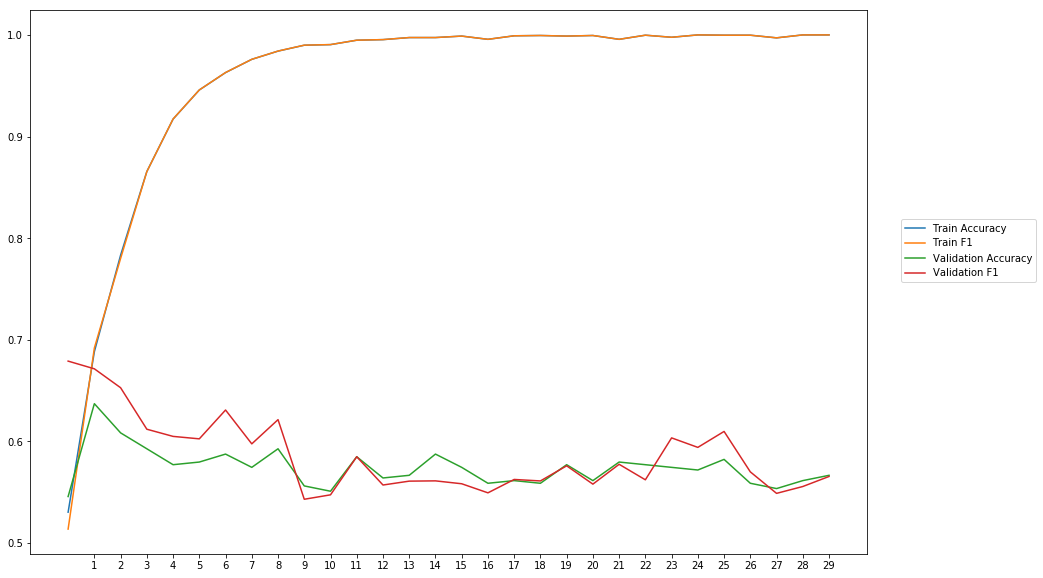

Average Accuracy: 57.41%
Average Precision: 57.15%
Average Recall: 60.75%
Average F1: 58.59%

-----Fold 9--------


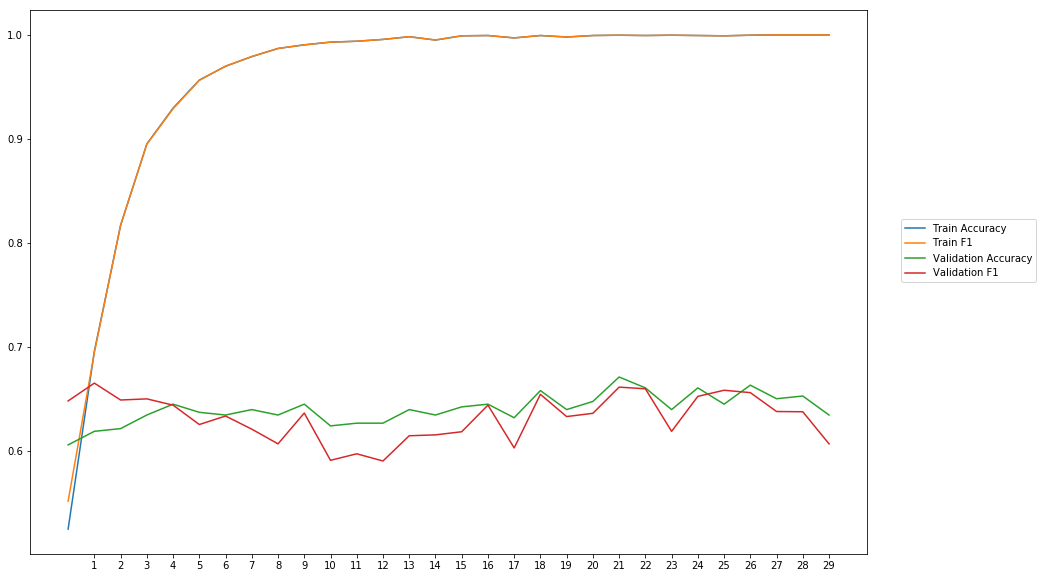

Average Accuracy: 64.03%
Average Precision: 64.98%
Average Recall: 61.89%
Average F1: 63.21%

-----Fold 10--------


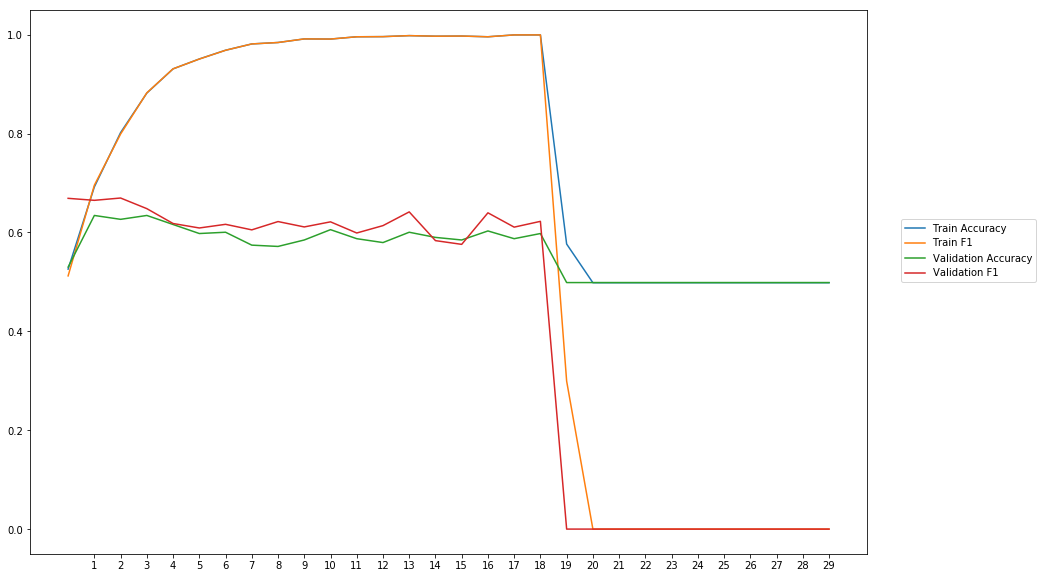

Average Accuracy: 55.98%
Average Precision: 37.13%
Average Recall: 42.59%
Average F1: 39.48%

-------Overallresults-------


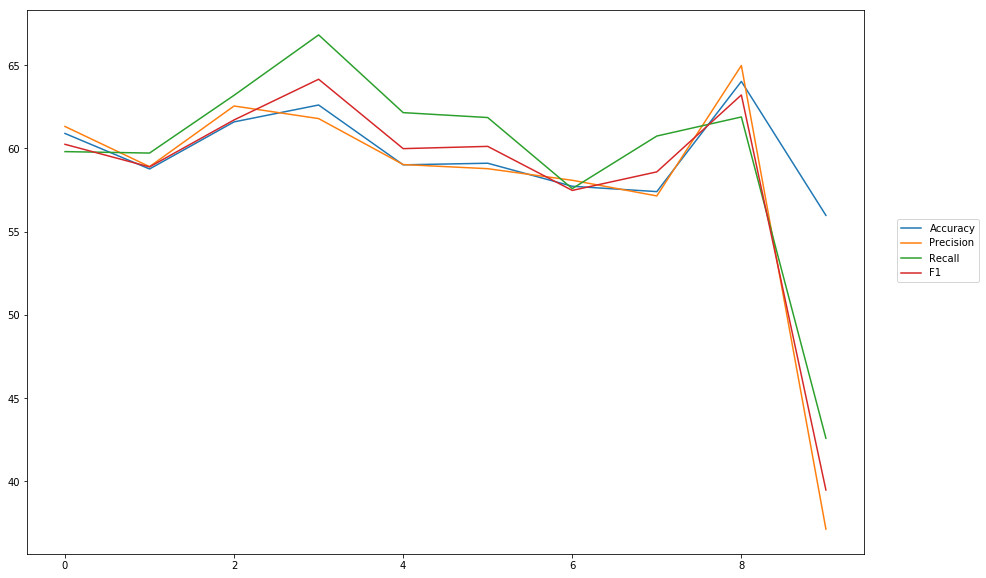

Accuracy: Mean = 59.71% (+/- 2.39%), Max = 64.03%, Min =  55.98%
Precision: Mean = 57.97% (+/- 7.31%), Max = 64.98%, Min =  37.13%
Recall: Mean = 59.64% (+/- 6.14%), Max = 66.82%, Min =  42.59%
F1: Mean = 58.39% (+/- 6.60%), Max = 64.16%, Min =  39.48%


In [15]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'alstm_1_700')  

## AttentiveLSTM one LSTM-layer, 300 neurons

In [ ]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer6 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences6 = wv_layer6(comment_input6)

#Frist GRU Layer
x6 = LSTM(300, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')(embedded_sequences6)

#Attention Layer
x6 = Attention()(x6)

#Output (Dense) Layer
preds6 = Dense(2, activation='softmax')(x6)

# build the model
model6 = Model(inputs=[comment_input6], outputs=preds6)


-----Fold 1--------


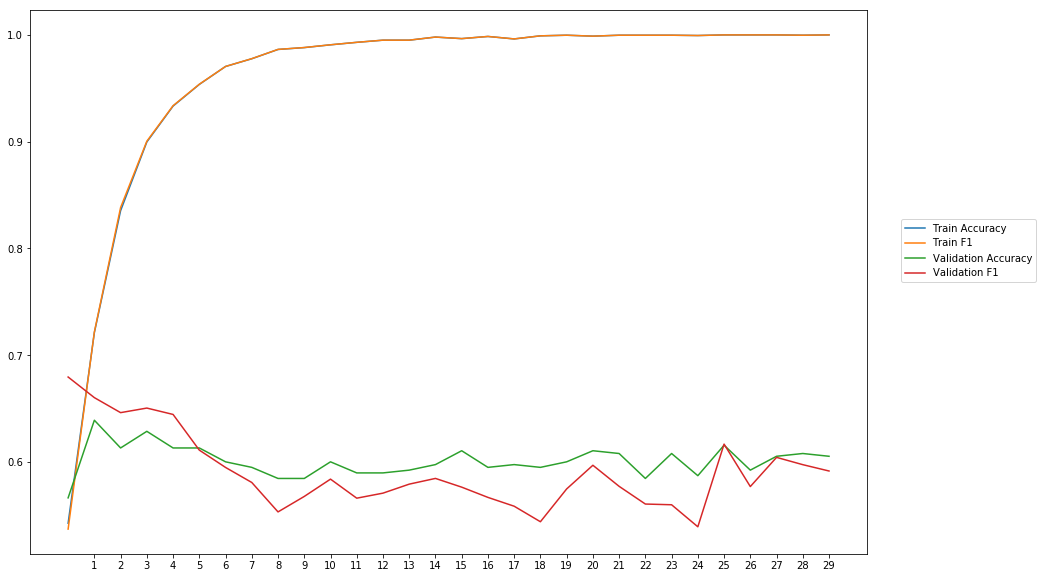

Average Accuracy: 60.09%
Average Precision: 60.88%
Average Recall: 58.01%
Average F1: 59.04%

-----Fold 2--------


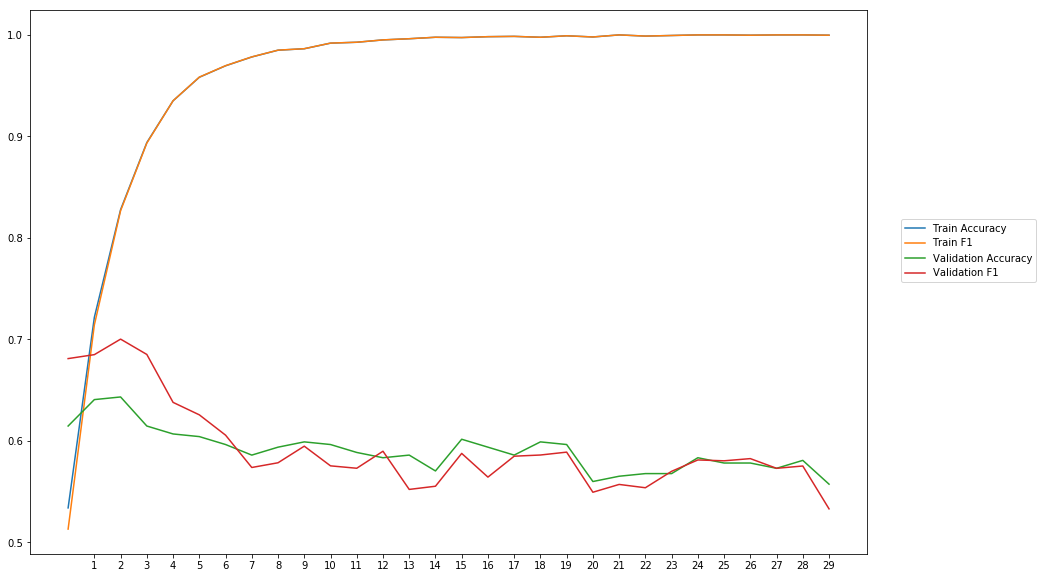

Average Accuracy: 59.04%
Average Precision: 59.11%
Average Recall: 60.05%
Average F1: 59.26%

-----Fold 3--------


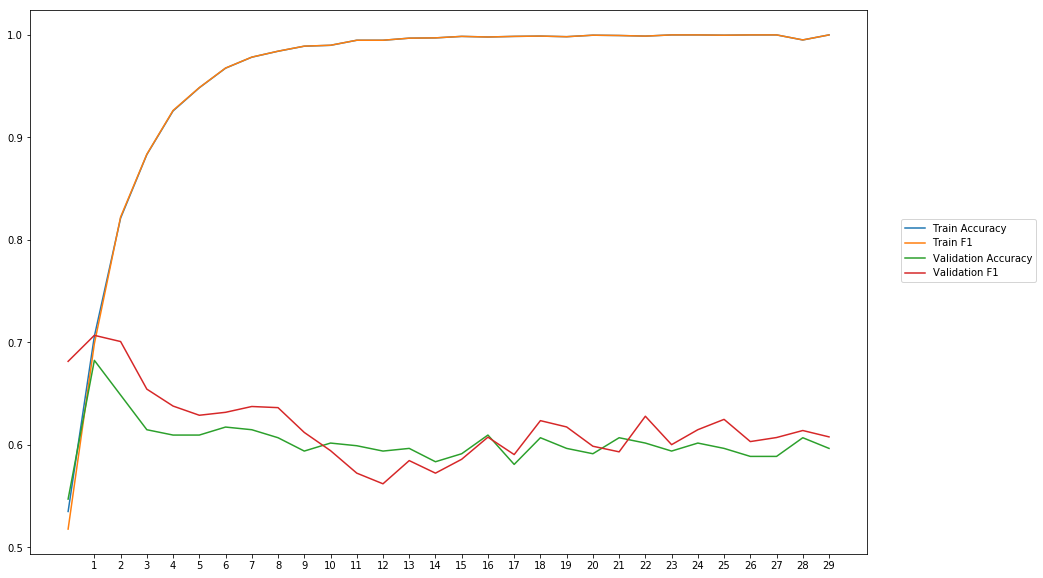

Average Accuracy: 60.24%
Average Precision: 59.86%
Average Recall: 64.44%
Average F1: 61.75%

-----Fold 4--------


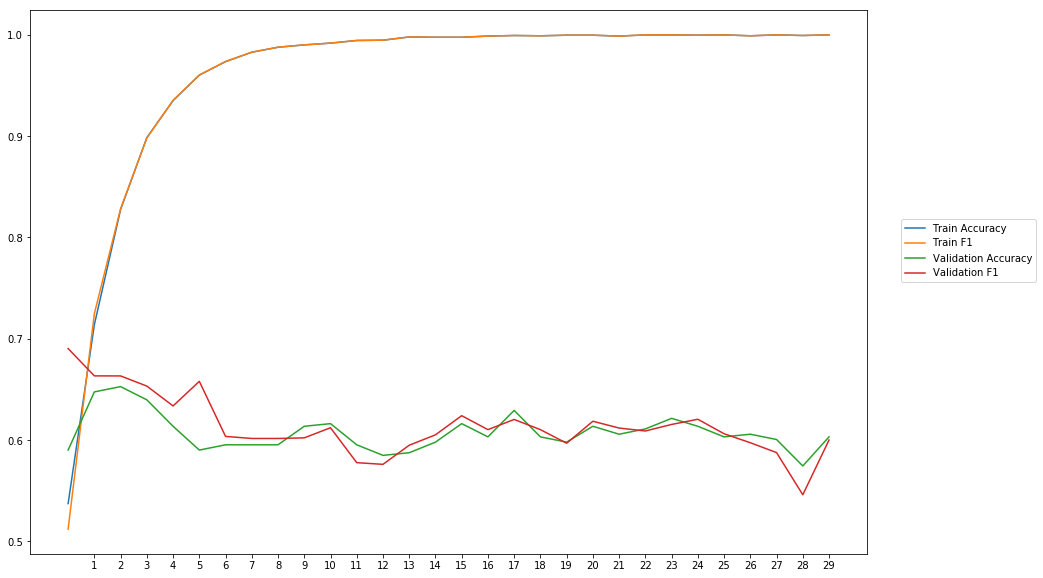

Average Accuracy: 60.72%
Average Precision: 60.59%
Average Recall: 62.64%
Average F1: 61.37%

-----Fold 5--------


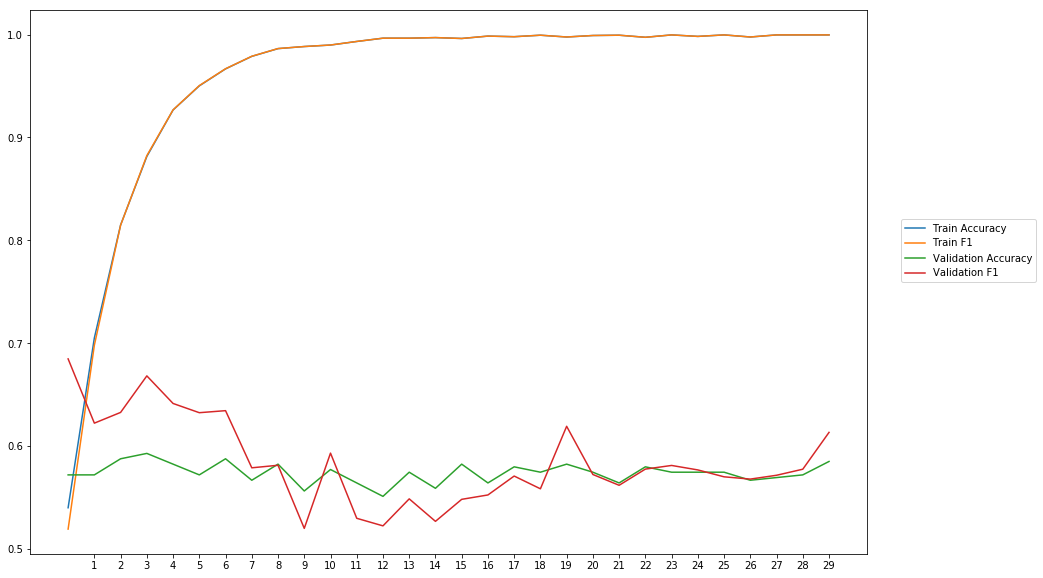

Average Accuracy: 57.37%
Average Precision: 57.16%
Average Recall: 60.73%
Average F1: 58.44%

-----Fold 6--------


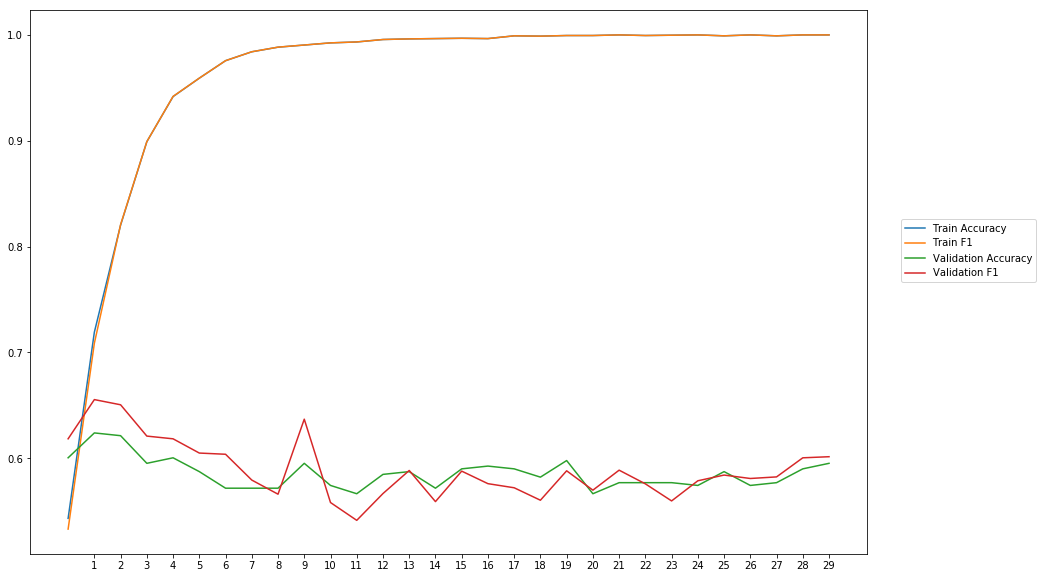

Average Accuracy: 58.58%
Average Precision: 58.55%
Average Recall: 59.53%
Average F1: 58.93%

-----Fold 7--------


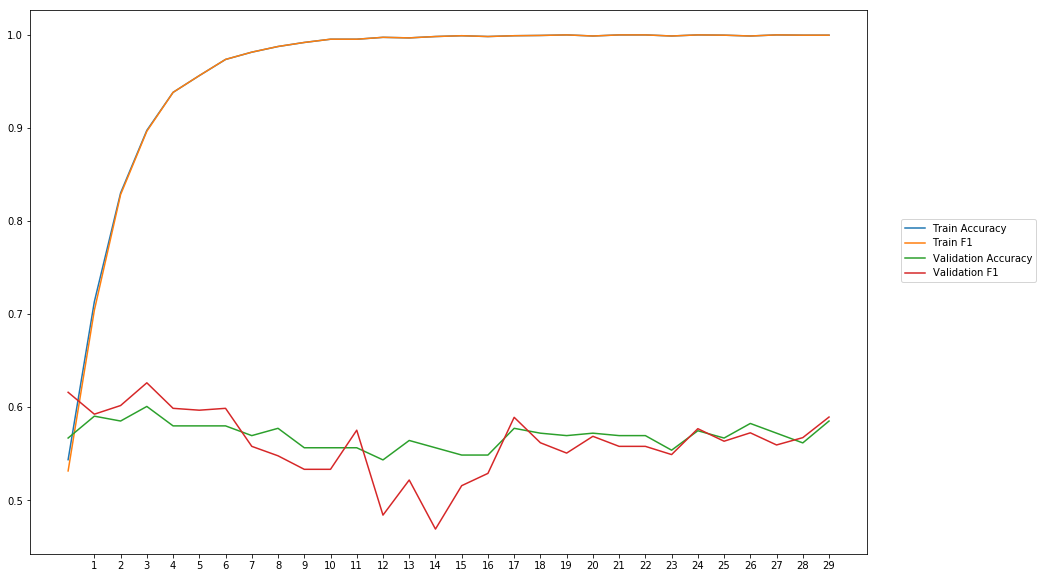

Average Accuracy: 56.93%
Average Precision: 57.28%
Average Recall: 55.50%
Average F1: 56.18%

-----Fold 8--------


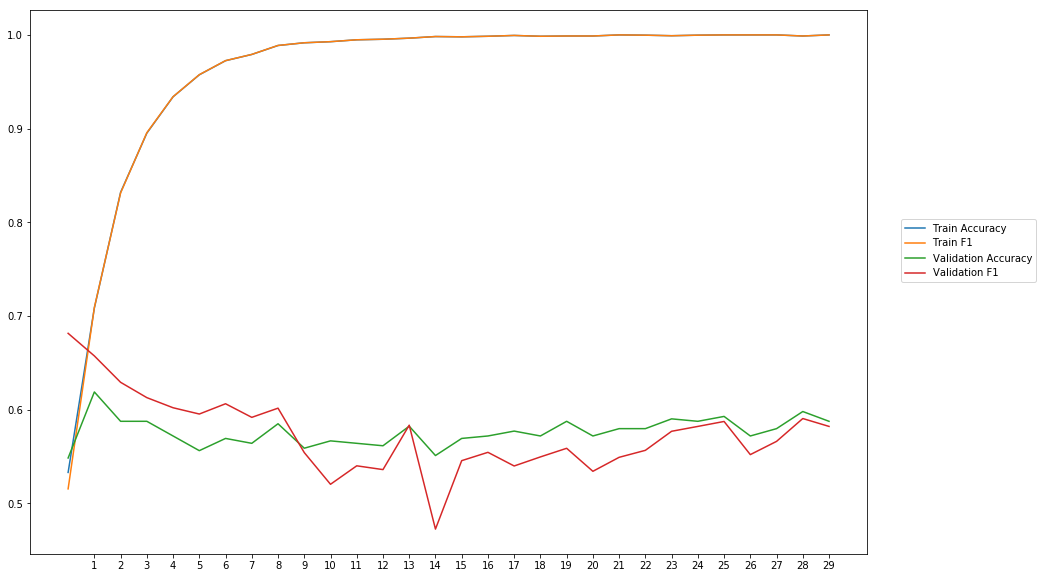

Average Accuracy: 57.62%
Average Precision: 57.96%
Average Recall: 57.71%
Average F1: 57.36%

-----Fold 9--------


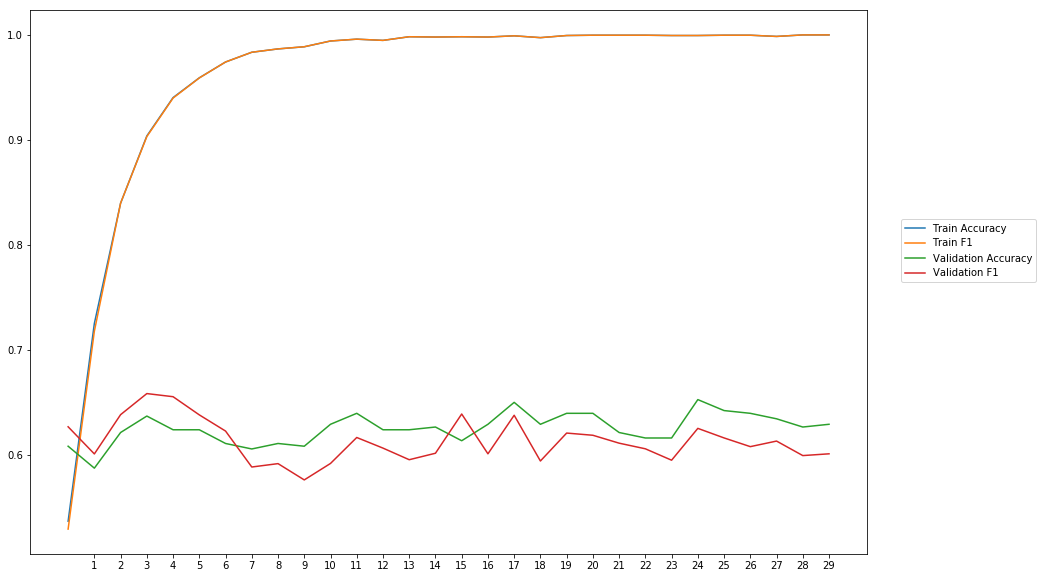

Average Accuracy: 62.54%
Average Precision: 63.72%
Average Recall: 59.44%
Average F1: 61.33%

-----Fold 10--------


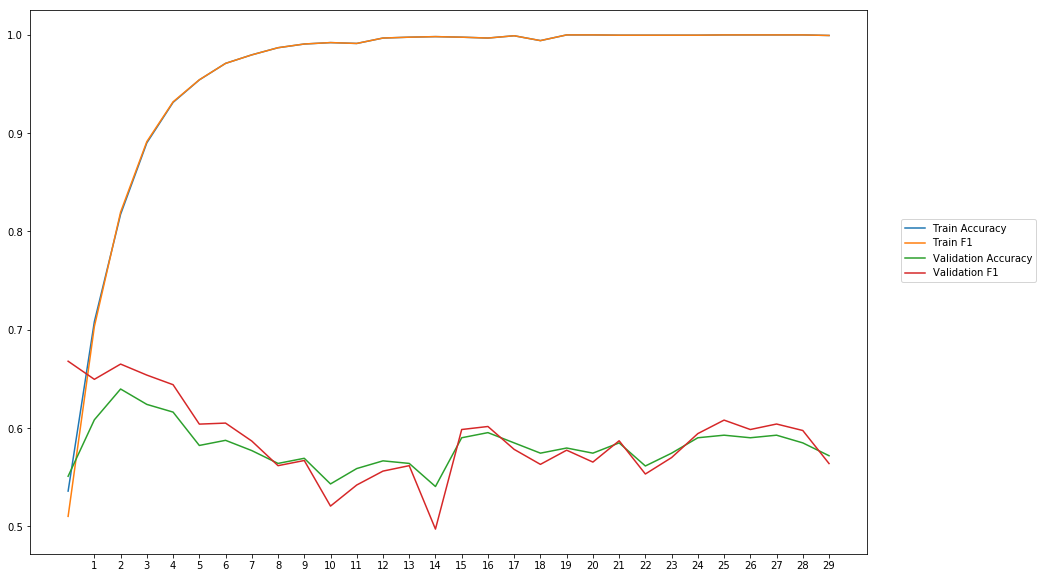

Average Accuracy: 58.11%
Average Precision: 57.92%
Average Recall: 60.23%
Average F1: 58.81%

-------Overallresults-------


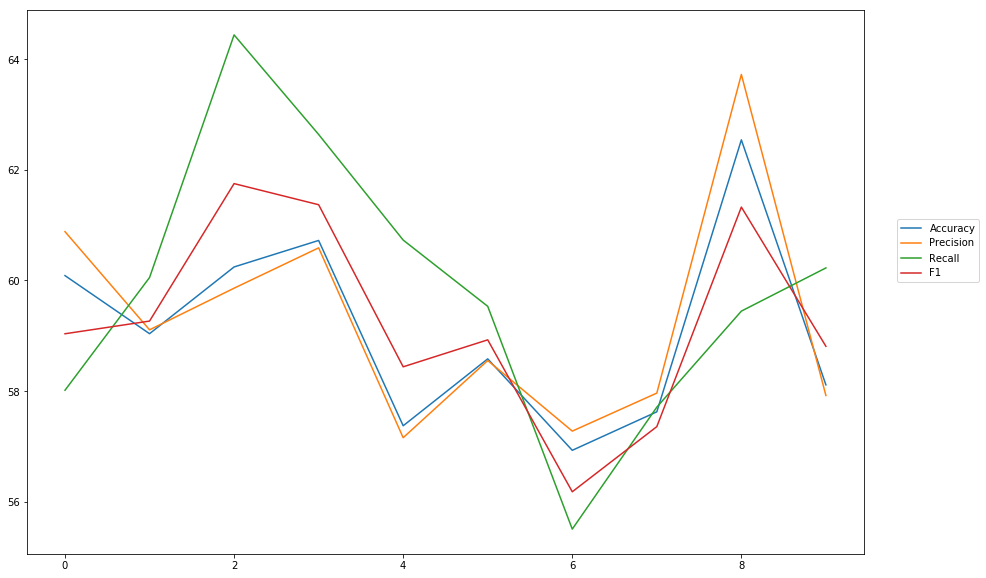

Accuracy: Mean = 59.12% (+/- 1.67%), Max = 62.54%, Min =  56.93%
Precision: Mean = 59.30% (+/- 1.92%), Max = 63.72%, Min =  57.16%
Recall: Mean = 59.83% (+/- 2.39%), Max = 64.44%, Min =  55.50%
F1: Mean = 59.24% (+/- 1.71%), Max = 61.75%, Min =  56.18%


In [14]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_300')  

## Train and evaluate the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


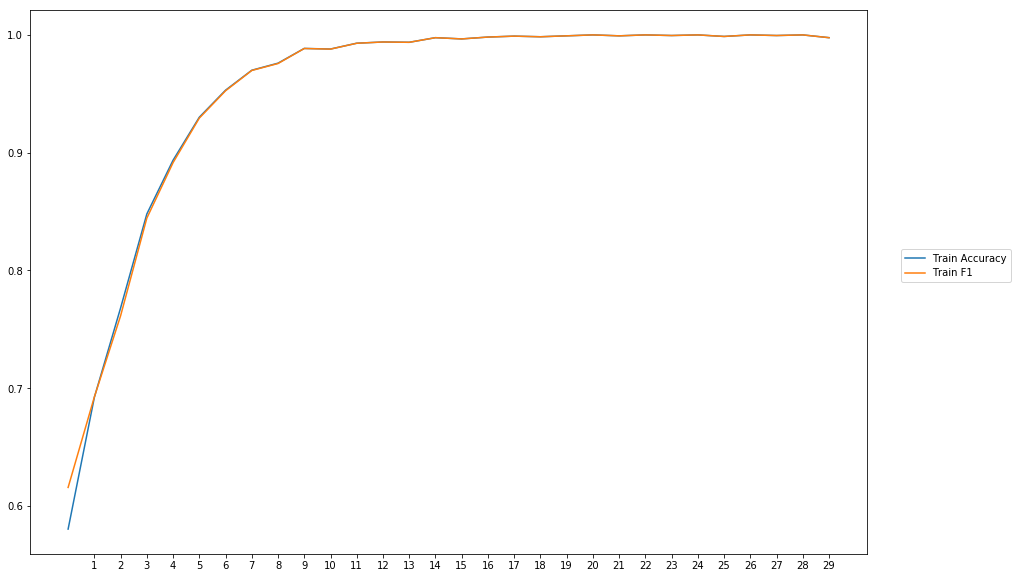


-----Test Scores----
Loss: 2.763334439725292
Accuracy: 64.28571428571429
Precision: 53.49887131975195
Recall: 76.20578775684702
F1: 62.8647166219776


In [9]:
#train, save and evaluate the model
train_evaluate_final_model(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_AttentiveLSTM')